# Zimbabwe DHS Survery: Understanding DHS Clustering

<strong>Blog</strong>: <a href="https://www.daikiminaki.com/">Daiki Minaki Data Blog </a><br>
<strong>Github</strong>: <a href="https://github.com/daikiminaki/zimbabwe_analysis/">https://github.com/daikiminaki/zimbabwe_analysis/</a>

### About The Data:
Demographic & Health Surveys Preprocessed Data: <a href="https://www.kaggle.com/taniaj/zimbabwe-preprocessed/home">Source Here</a>

The dataset contains preprocessed data from the DHS for Zimbabwe. There are five main data files:

1. Household data
2. Household Member data
3. Births data
4. Cluster information
5. Geographic information (shapefile)

For this notebook I have summarized all household and household member data by DHS Cluster as this provides the best structure to focus on analysis by DHS Clusters.

### Question: 

Why is the distribution for electricity and cooking fuel deprivation by DHS so polarized? (Clear cut between DHSs that have it and don't. No middle ground.) What factors relate to this? What can be done?
    
(Based on observations made during data exploration)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import glob as glob

In [5]:
"""Zimbabwe Data"""
zimbabwe_clean = pd.read_csv('data/zimbabwe_full.csv').drop(columns=['Unnamed: 0'])
Zimbabwe_dhs_mpi_admin2_sjoin = pd.read_csv('data/Zimbabwe_dhs_mpi_admin2_sjoin.csv')
zimbabwe_dhs = pd.read_csv('data/zimbabwe_dhs_cluster.csv')

In [6]:
zimbabwe_dhs = zimbabwe_dhs[zimbabwe_dhs.Malaria_2015 > 0]

### Notebook Structure:
1. #### Data Wrangling
    - Summarize Household Data by DHS
    - Calculate Variable Change Variables
2. #### Exploratory Data Analysis (Overall)
    - Understanding Overall Trends by DHS
    - Understanding Relationships between Variables
3. #### Inferential Statistics
    - Answer Question:
        - Question Specific: EDA
        - Question Specific: Test Statistics
        - Question Specific: Hypothesis Testing
        - Question Specific: Conclusion & Suggestions
4. #### Conclusion
    - Final Takeaways/Final Remarks

# 1. Data Wrangling

### Calculate Percentages from Binary Data by DHS

In [7]:
#Columns with Binary Data
binary_columns = ['financial_depriv', 'electricity_depriv', 'water_depriv', 'sanitation_depriv',\
                  'cooking_fuel_depriv', 'floor_depriv', 'information_asset', 'mobility_asset',\
                  'livelihood_asset', 'asset_depriv','child_under_5', 'woman_15_to_49',\
                  'child_not_in_school', 'school_attainment_depriv', 'school_attendance_depriv']

#Get Percent Deprivation by DHS by grouping dhs by mean.
binary_dhs_data = zimbabwe_clean.groupby('DHSID').mean()[binary_columns].reset_index()

#Merge Percentiles to DHS
zimbabwe_dhs = zimbabwe_dhs.merge(binary_dhs_data)

### Calculate Averages of Important Variables by DHS

In [8]:
#Columns that need to be Averaged
average_columns = ['total_household_members','total_of_weighted_deprivations','headcount_poor','total_poverty_intensity']

#Average columns grouped by DHS
average_dhs_data = zimbabwe_clean.groupby('DHSID').mean()[average_columns].reset_index()

#Merge Averages to DHS
zimbabwe_dhs = zimbabwe_dhs.merge(average_dhs_data)

### Calculate Percent Changes From 2010 to 2015 by DHS

In [9]:
#Population Change by DHS
zimbabwe_dhs['population_change_2010_2015'] = zimbabwe_dhs['All_Population_Count_2015'] / zimbabwe_dhs['All_Population_Count_2010']

#Population Density Change by DHS
zimbabwe_dhs['pop_density_change_2010_2015'] = zimbabwe_dhs['All_Population_Density_2015'] / zimbabwe_dhs['All_Population_Density_2010']

#Vegetation Index Change by DHS
zimbabwe_dhs['vegetation_change_2010_2015'] = zimbabwe_dhs['Enhanced_Vegetation_Index_2015'] / zimbabwe_dhs['Enhanced_Vegetation_Index_2010']

#Insecticide-Treated Nets (ITN) Cover Change by DHS
zimbabwe_dhs['itn_coverage_change_2010_2015'] = zimbabwe_dhs['ITN_Coverage_2015'] / zimbabwe_dhs['ITN_Coverage_2010']

#Malaria Change by DHS
zimbabwe_dhs['malaria_change_2010_2015'] = zimbabwe_dhs['Malaria_2015'] / zimbabwe_dhs['Malaria_2010']

#Rainfall Change by DHS
zimbabwe_dhs['rainfall_change_2010_2015'] = zimbabwe_dhs['Rainfall_2015'] / zimbabwe_dhs['Rainfall_2010']

# 2) Exploratory Data Analysis: Understanding DHS Variables (Overall)

## Total Population Zimbabwe

In [10]:
print('Total Population: ', np.sum(zimbabwe_dhs.All_Population_Count_2015))

Total Population:  14509439.76796224


## Population by DHS
#### Majority of DHS Population Sizes are between 0 and 50,000 with some larger populations scattered about (Large Cities).

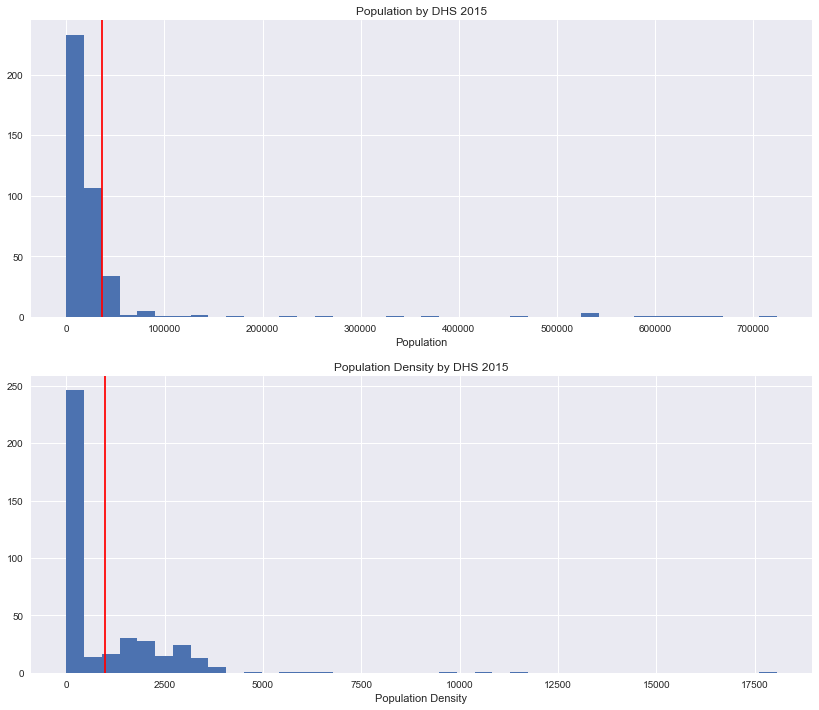

In [13]:
_ = plt.figure(figsize=(14,12))
_ = plt.subplot(2,1,1)
_ = plt.hist(zimbabwe_dhs.All_Population_Count_2015, bins=40)
_ = plt.axvline(np.mean(zimbabwe_dhs.All_Population_Count_2015), color='red')
_ = plt.title('Population by DHS 2015')
_ = plt.xlabel('Population')

_ = plt.subplot(2,1,2)
_ = plt.hist(zimbabwe_dhs.All_Population_Density_2015, bins=40)
_ = plt.axvline(np.mean(zimbabwe_dhs.All_Population_Density_2015), color='red')
_ = plt.title('Population Density by DHS 2015')
_ = plt.xlabel('Population Density')

## Population Growth 2010 to 2015 by DHS
#### Growth is relatively uniform at around 110% with a few exceptions.

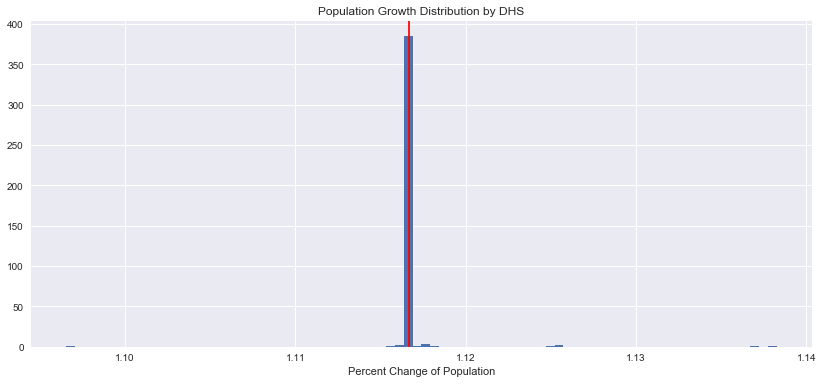

In [14]:
_ = plt.figure(figsize=(14,6))
_ = plt.hist(zimbabwe_dhs.population_change_2010_2015, bins=80)
_ = plt.axvline(np.mean(zimbabwe_dhs.population_change_2010_2015), color='red')
_ = plt.title('Population Growth Distribution by DHS')
_ = plt.xlabel('Percent Change of Population')

## Total Household Members by DHS
#### Average Household size is around 5 with a fairly normal distribution.

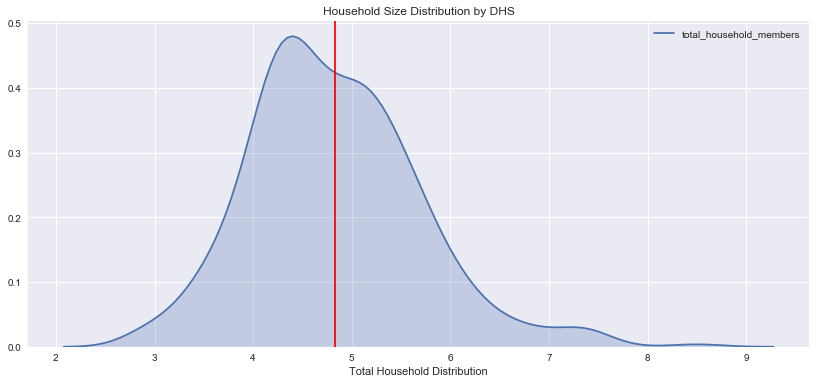

In [15]:
_ = plt.figure(figsize=(14,6))
_ = sns.kdeplot(zimbabwe_dhs.total_household_members, shade=True)
_ = plt.axvline(np.mean(zimbabwe_dhs.total_household_members), color='red')
_ = plt.title('Household Size Distribution by DHS')
_ = plt.xlabel('Total Household Distribution')

## Total Poverty Intensity by DHS
#### Average Poverty Intensity is 0.66.

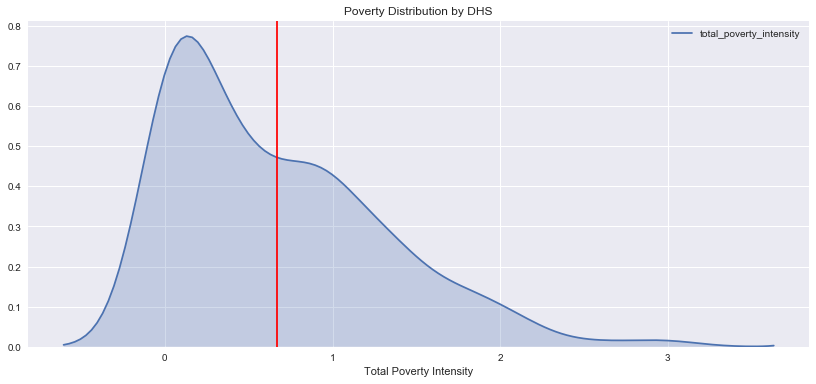

In [16]:
_ = plt.figure(figsize=(14,6))
_ = sns.kdeplot(zimbabwe_dhs.total_poverty_intensity, shade=True)
_ = plt.axvline(np.mean(zimbabwe_dhs.total_poverty_intensity), color='red')
_ = plt.title('Poverty Distribution by DHS')
_ = plt.xlabel('Total Poverty Intensity')

## Household Poor Headcount 
#### On Average about 2 people per household are affected by poverty

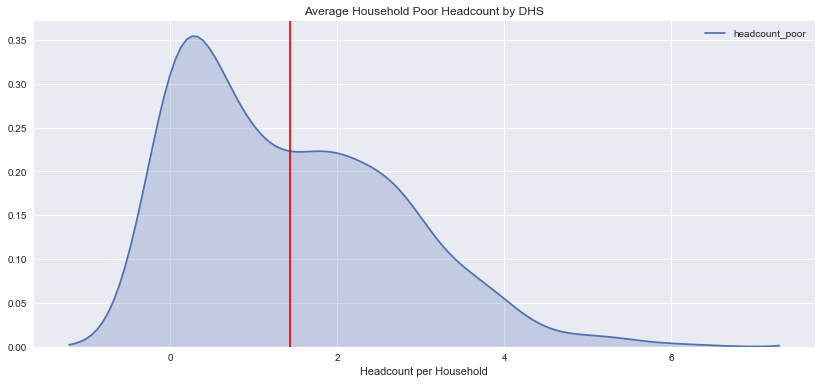

In [17]:
_ = plt.figure(figsize=(14,6))
_ = sns.kdeplot(zimbabwe_dhs.headcount_poor, shade=True)
_ = plt.axvline(np.mean(zimbabwe_dhs.headcount_poor), color='red')
_ = plt.title('Average Household Poor Headcount by DHS')
_ = plt.xlabel('Headcount per Household')

## Families with Child under 5

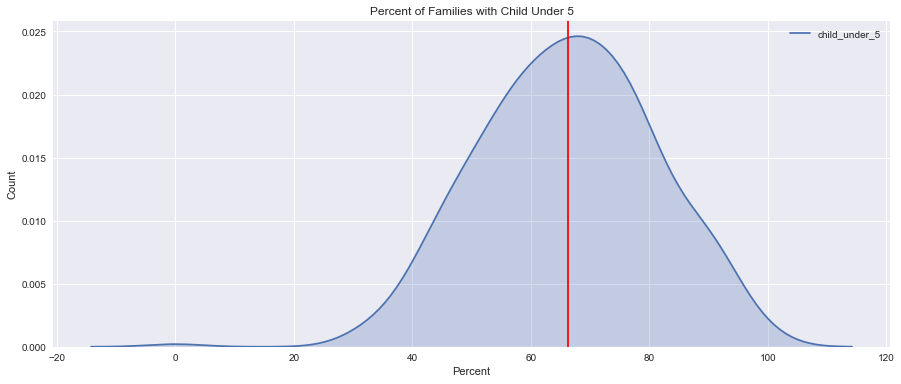

In [18]:
_ = plt.figure(figsize=(15,6))
_ = sns.kdeplot(zimbabwe_dhs['child_under_5'] * 100, shade=True)
_ = plt.axvline(np.mean(zimbabwe_dhs['child_under_5']) * 100, color='red')
_ = plt.title('Percent of Families with Child Under 5')
_ = plt.xlabel('Percent')
_ = plt.ylabel('Count')

# Depravity
- Higher Deprivation: Finanical (72%) & Sanitation (62%)
- Lower Deprivation: Water (40%) & Floor (23%)
- <strong>Split Deprivtion: Electricity (60%) & Cooking Fuel (63%)</strong>

#### Question: Why is it split in electricity and cooking fuel deprivation? What factors relate to this? What can be done?

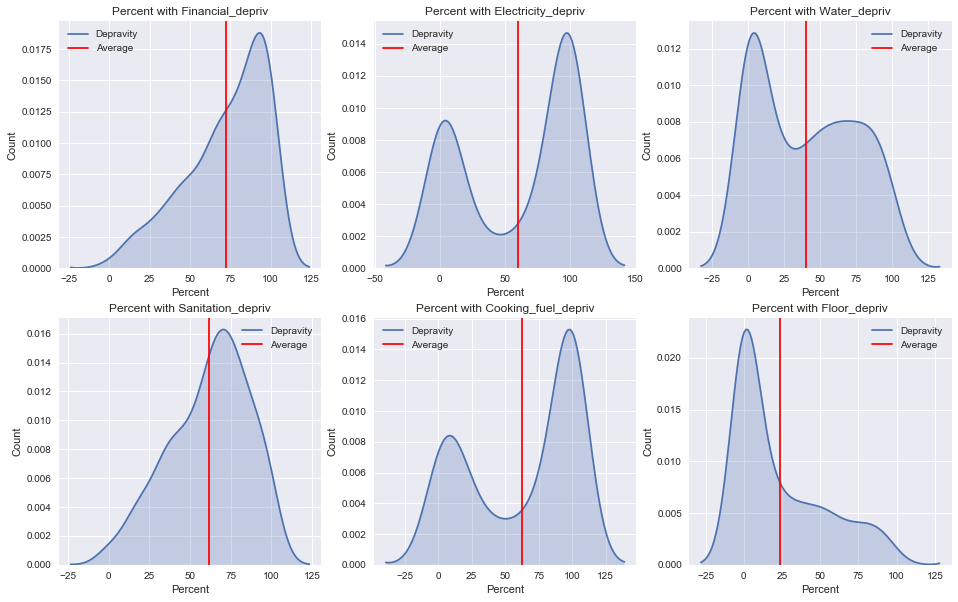

In [24]:
deprivation = ['financial_depriv', 'electricity_depriv', 'water_depriv',\
               'sanitation_depriv', 'cooking_fuel_depriv', 'floor_depriv']

_ = plt.figure(figsize=(16,10))
for i in range(len(deprivation)):
    column = deprivation[i]
    _ = plt.subplot(2,3, i + 1)
    _ = sns.kdeplot(zimbabwe_dhs[column] * 100, shade=True)
    _ = plt.axvline(np.mean(zimbabwe_dhs[column]) * 100, color='red')
    _ = plt.title('Percent with ' + column.capitalize())
    _ = plt.legend(['Depravity','Average'])
    _ = plt.xlabel('Percent')
    _ = plt.ylabel('Count')
_ = plt.savefig('figures/7_depravity_distributions')

## Assets Ownership
Asset ownership is <strong>relatively high</strong>. Asset Deprivation is <strong>relatively low</strong>. Mobility   is <strong>lower</strong> and has a more normal distribution.

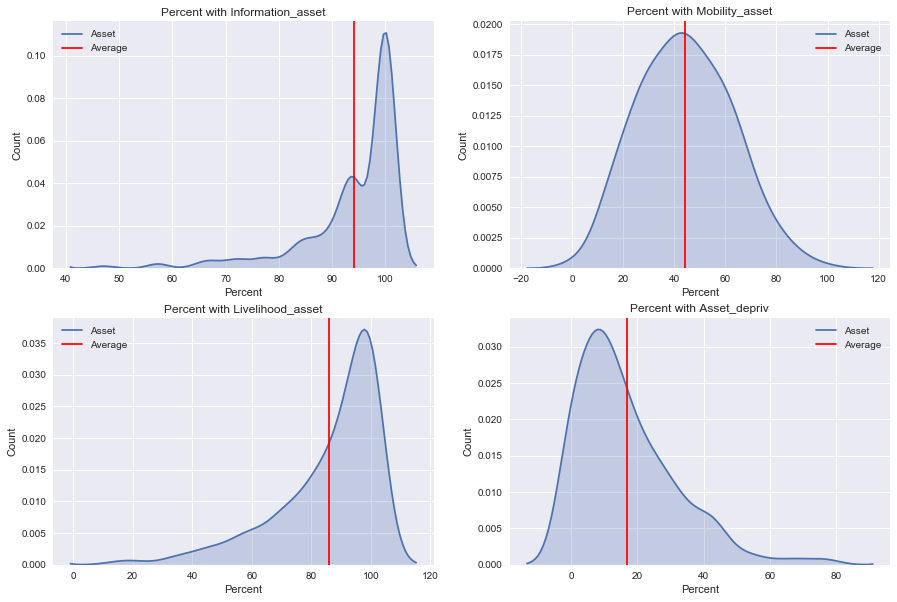

In [25]:
asset_columns = ['information_asset', 'mobility_asset', 'livelihood_asset', 'asset_depriv']

_ = plt.figure(figsize=(15,10))
for i in range(len(asset_columns)):
    column = asset_columns[i]
    _ = plt.subplot(2,2, i + 1)
    _ = sns.kdeplot(zimbabwe_dhs[column] * 100, shade=True)
    _ = plt.axvline(np.mean(zimbabwe_dhs[column]) * 100, color='red')
    _ = plt.legend(['Asset','Average'])
    _ = plt.title('Percent with ' + column.capitalize())
    _ = plt.xlabel('Percent')
    _ = plt.ylabel('Count')
_ = plt.savefig('figures/8_assets_distributions')

## Schooling
For the most part, the population without schooling is <strong>very low</strong> with averages all under 5%.

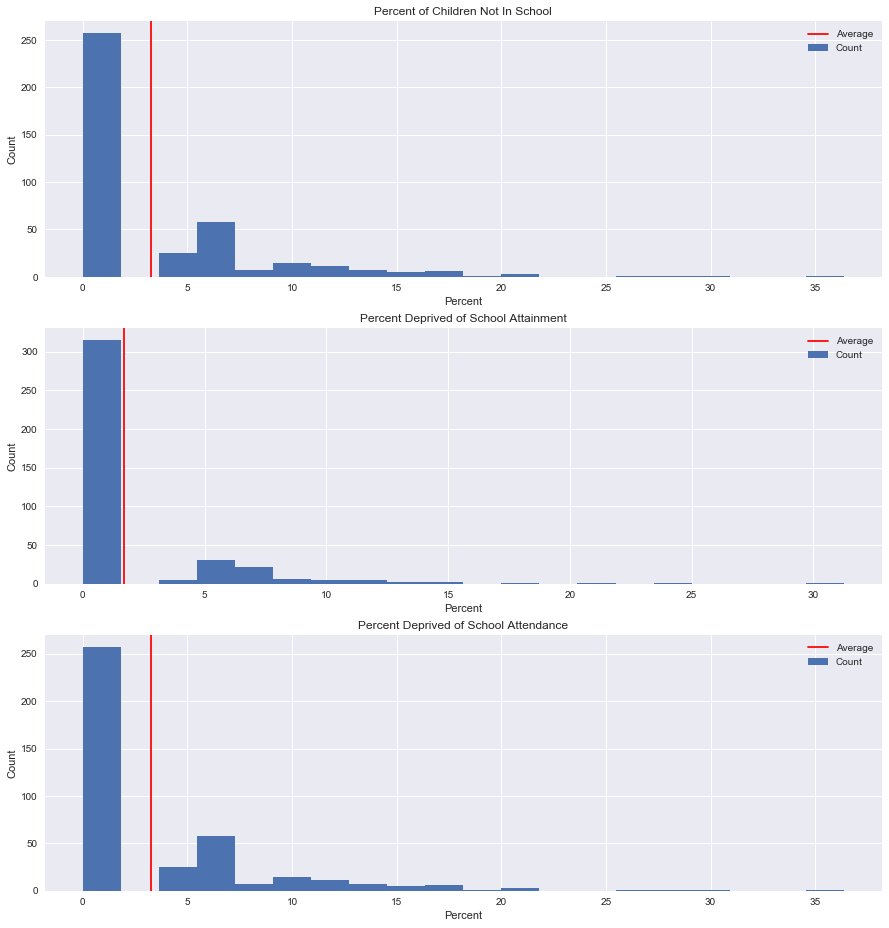

In [30]:
school_columns = ['child_not_in_school', 'school_attainment_depriv', 'school_attendance_depriv']
school_titles = ['Percent of Children Not In School','Percent Deprived of School Attainment','Percent Deprived of School Attendance']
_ = plt.figure(figsize=(15,16))
for i in range(len(school_columns)):
    column = school_columns[i]
    _ = plt.subplot(3,1, i + 1)
    _ = plt.hist(zimbabwe_dhs[column] * 100, bins=20)
    _ = plt.axvline(np.mean(zimbabwe_dhs[column]) * 100, color='red')
    _ = plt.title(school_titles[i])
    _ = plt.legend(['Average','Count'])
    _ = plt.xlabel('Percent')
    _ = plt.ylabel('Count')
_ = plt.savefig('figures/9_schooling')

## Geographic

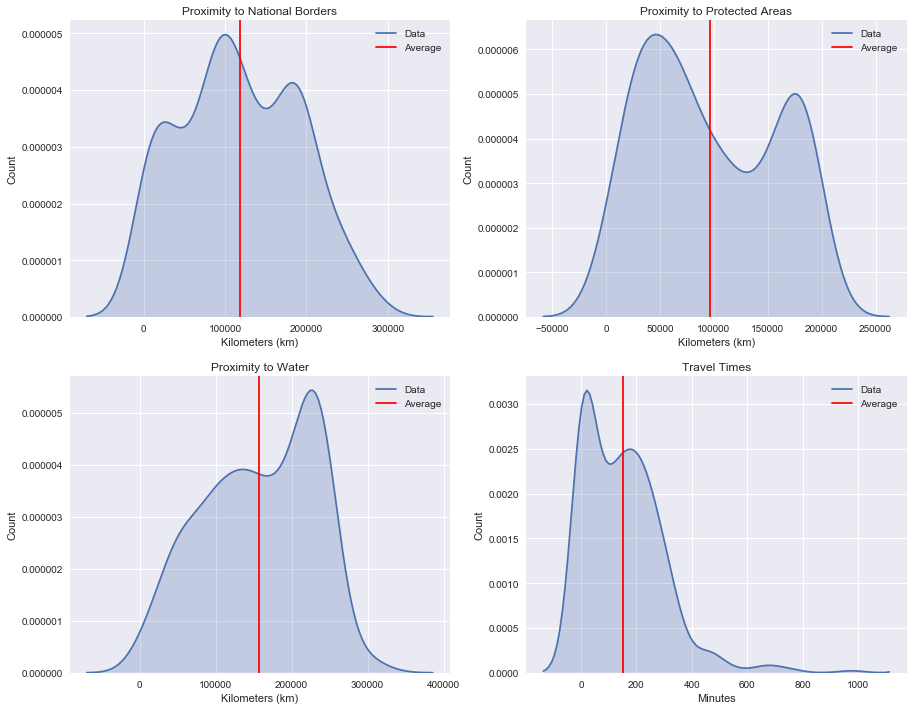

In [35]:
geographic = ['Proximity_to_National_Borders','Proximity_to_Protected_Areas','Proximity_to_Water','Travel_Times']
geographic_titles = ['Proximity to National Borders','Proximity to Protected Areas','Proximity to Water','Travel Times']
geographic_xlabel = ['Kilometers (km)','Kilometers (km)','Kilometers (km)','Minutes']
_ = plt.figure(figsize=(15,12))
for i in range(len(geographic)):
    column = geographic[i]
    _ = plt.subplot(2,2, i + 1)
    _ = sns.kdeplot(zimbabwe_dhs[column], shade=True)
    _ = plt.axvline(np.mean(zimbabwe_dhs[column]), color='red')
    _ = plt.legend(['Data','Average'])
    _ = plt.title(geographic_titles[i])
    _ = plt.xlabel(geographic_xlabel[i])
    _ = plt.ylabel('Count')
_ = plt.savefig('figures/10_geographic')

## Water and Vegetation

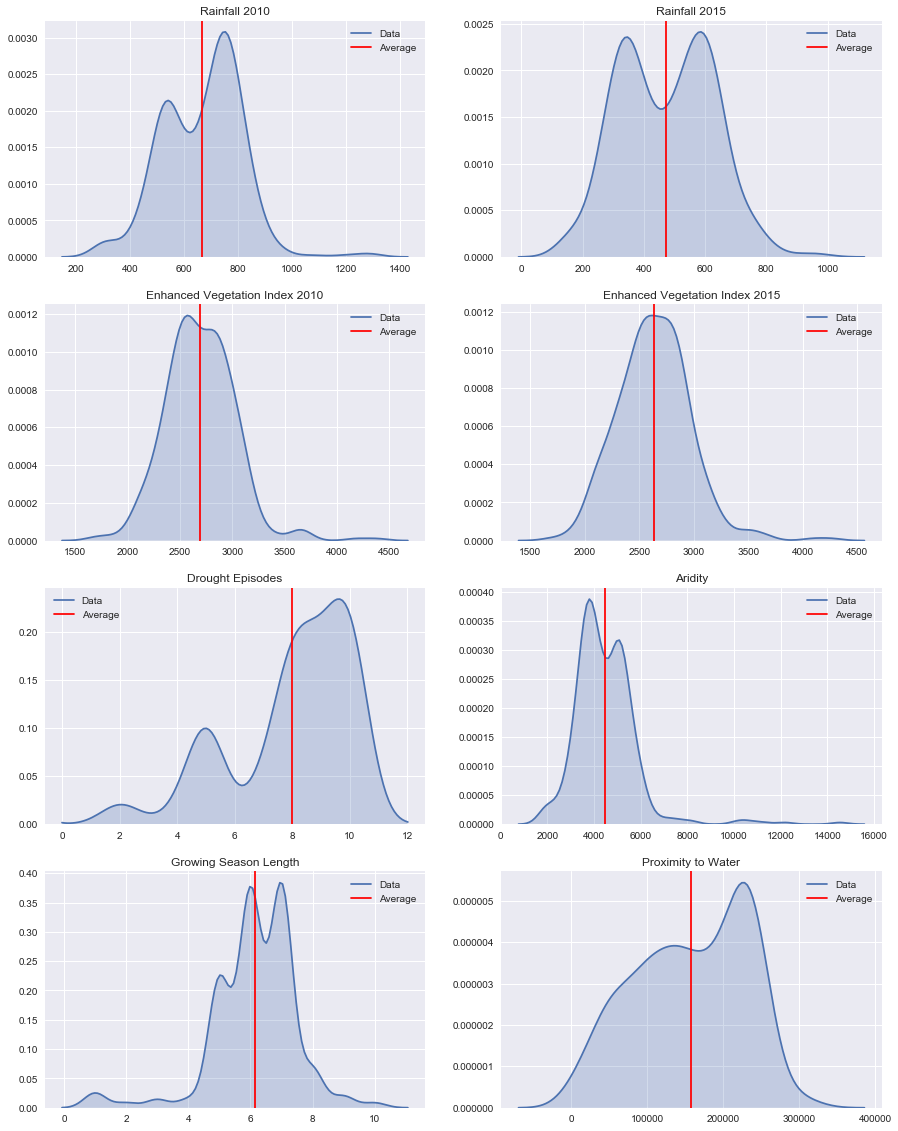

In [37]:
water_columns = ['Rainfall_2010','Rainfall_2015','Enhanced_Vegetation_Index_2010','Enhanced_Vegetation_Index_2015',\
                 'Drought_Episodes', 'Aridity','Growing_Season_Length','Proximity_to_Water']

_ = plt.figure(figsize=(15,20))
for i in range(len(water_columns)):
    column = water_columns[i]
    _ = plt.subplot(4,2, i + 1)
    _ = sns.kdeplot(zimbabwe_dhs[column], shade=True)
    _ = plt.axvline(np.mean(zimbabwe_dhs[column]), color='red')
    _ = plt.title(' '.join(water_columns[i].split('_')))
    _ = plt.legend(['Data','Average'])
_ = plt.savefig('figures/11_water_vegetation')

## Mosquitos

In [39]:
malaria = ['ITN_Coverage_2010', 'ITN_Coverage_2015','Malaria_2010', 'Malaria_2015']
malaria_title = ['ITN Coverage in 2010', 'ITN Coverage in 2015','Malaria Cases in 2010', 'Malaria Cases in 2015']
malaria_real = zimbabwe_dhs[zimbabwe_dhs.Malaria_2010 > 0]

for i in range(len(malaria)):
    print('Average ', malaria_title[i], ': ', np.mean(malaria_real[malaria[i]]))

Average  ITN Coverage in 2010 :  0.12317115326315795
Average  ITN Coverage in 2015 :  0.39134176764160405
Average  Malaria Cases in 2010 :  0.0442410437142857
Average  Malaria Cases in 2015 :  0.043222653842105274


#### Large Increase in ITN Coverage (Over 20%) but only Small Descrease In Malaria Cases (About 0.1%)

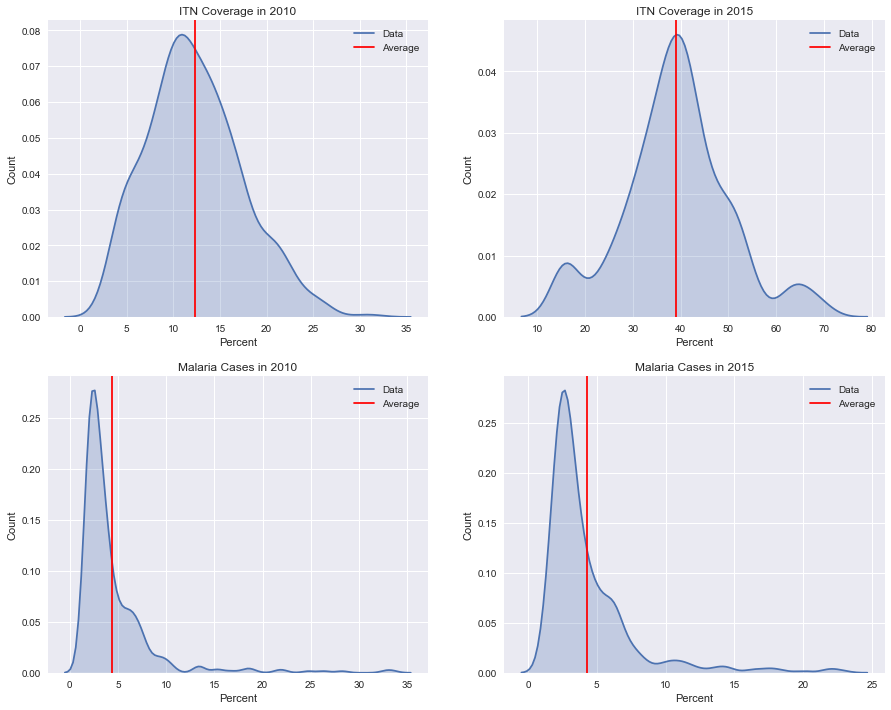

In [43]:
_ = plt.figure(figsize=(15,12))
for i in range(len(malaria)):
    column = malaria[i]
    _ = plt.subplot(2,2, i + 1)
    _ = sns.kdeplot(malaria_real[column] * 100, shade=True)
    _ = plt.axvline(np.mean(malaria_real[column]) * 100, color='red')
    _ = plt.title(malaria_title[i])
    _ = plt.legend(['Data','Average'])
    _ = plt.xlabel('Percent')
    _ = plt.ylabel('Count')
_ = plt.savefig('figures/12_mosquitos')

## Global Human Footprint by DHS
The Distribution of Global Human Footprint is not normal with a clear cluster of lower footprint DHS's and higher footprint DHSs.

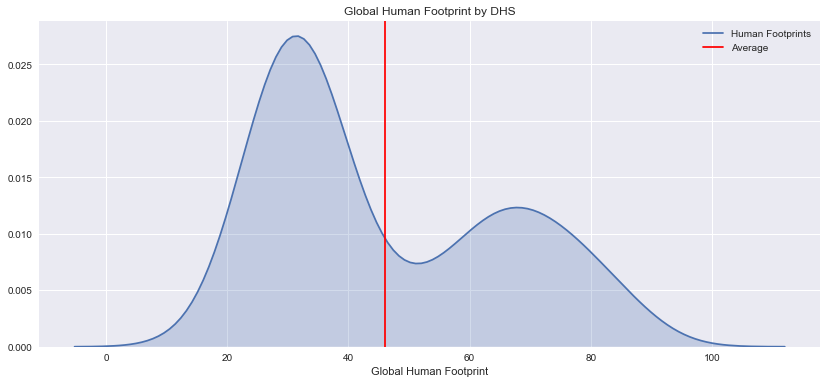

In [44]:
_ = plt.figure(figsize=(14,6))
_ = sns.kdeplot(zimbabwe_dhs.Global_Human_Footprint, shade=True)
_ = plt.axvline(np.mean(zimbabwe_dhs.Global_Human_Footprint), color='red')
_ = plt.title('Global Human Footprint by DHS')
_ = plt.xlabel('Global Human Footprint')
_ = plt.legend(['Human Footprints','Average'])
_ = plt.savefig('figures/13_human_footprint')

## Nightlight Composite by DHS

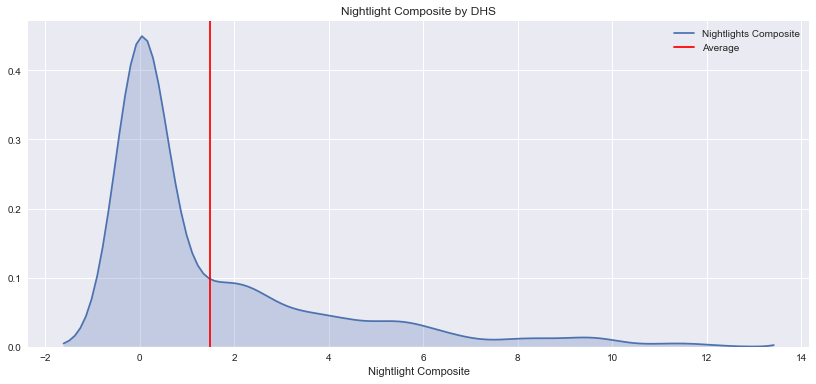

In [45]:
_ = plt.figure(figsize=(14,6))
_ = sns.kdeplot(zimbabwe_dhs.Nightlights_Composite, shade=True)
_ = plt.axvline(np.mean(zimbabwe_dhs.Nightlights_Composite), color='red')
_ = plt.title('Nightlight Composite by DHS')
_ = plt.xlabel('Nightlight Composite')
_ = plt.legend(['Nightlights Composite','Average'])
_ = plt.savefig('figures/14_nightlight_composite')

# 3) Exploratory Data Analysis: Understanding Relationships

# a) Poverty

### Total Poverty Intensity vs Total Household Members
There is clear positive correlation between Poverty and Household Size with higher poverty being associated with larger households.

Correlation:  0.6282203737355759


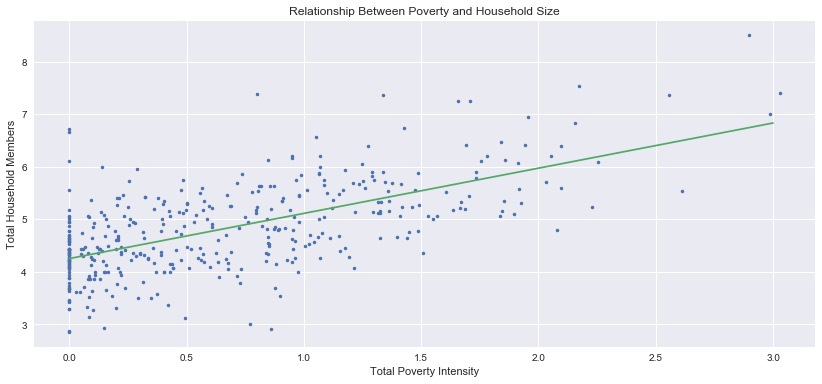

In [46]:
slope, intercept = np.polyfit(zimbabwe_dhs.total_poverty_intensity, zimbabwe_dhs.total_household_members, 1)
x_range = range(4)
_ = plt.figure(figsize=(14,6))
_ = plt.plot(zimbabwe_dhs.total_poverty_intensity, zimbabwe_dhs.total_household_members, linestyle='none', marker='.')
_ = plt.plot(x_range, slope*x_range + intercept)
_ = plt.title('Relationship Between Poverty and Household Size')
_ = plt.xlabel('Total Poverty Intensity')
_ = plt.ylabel('Total Household Members')
print('Correlation: ', np.corrcoef(zimbabwe_dhs.total_poverty_intensity, zimbabwe_dhs.total_household_members)[0][1])
_ = plt.savefig('figures/15_corr_poverty_household_size')

### Total Poverty Intensity vs Global Human Footprint
Negative Correlation: Higher Poverty, Lower Footprint

Correlation:  -0.6324570025454822


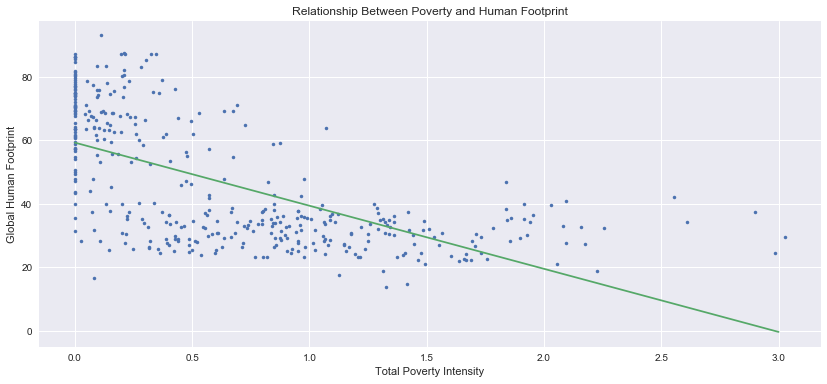

In [48]:
slope, intercept = np.polyfit(zimbabwe_dhs.total_poverty_intensity, zimbabwe_dhs.Global_Human_Footprint, 1)
x_range = range(4)
_ = plt.figure(figsize=(14,6))
_ = plt.plot(zimbabwe_dhs.total_poverty_intensity, zimbabwe_dhs.Global_Human_Footprint, linestyle='none', marker='.')
_ = plt.plot(x_range, slope*x_range + intercept)
_ = plt.title('Relationship Between Poverty and Human Footprint')
_ = plt.xlabel('Total Poverty Intensity')
_ = plt.ylabel('Global Human Footprint')
print('Correlation: ', np.corrcoef(zimbabwe_dhs.total_poverty_intensity, zimbabwe_dhs.Global_Human_Footprint)[0][1])
_ = plt.savefig('figures/16_corr_poverty_human_footprint')

### Total Poverty Intensity vs Nighlight Composite
Negative Correlation: Higher Poverty, Lower Nightlights

Correlation:  -0.5184730865507928


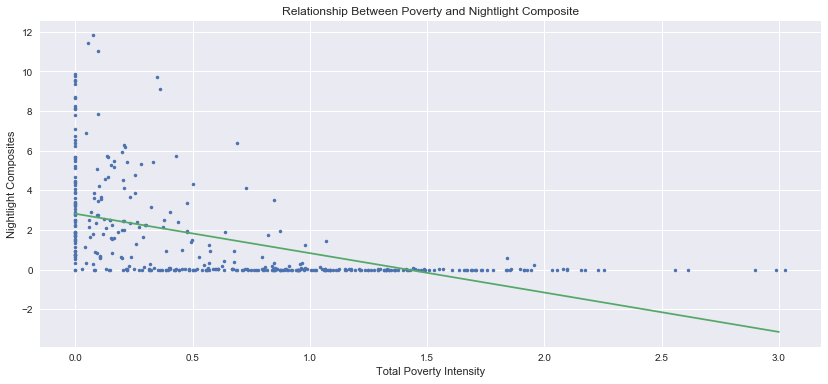

In [49]:
slope, intercept = np.polyfit(zimbabwe_dhs.total_poverty_intensity, zimbabwe_dhs.Nightlights_Composite, 1)
x_range = range(4)
_ = plt.figure(figsize=(14,6))
_ = plt.plot(zimbabwe_dhs.total_poverty_intensity, zimbabwe_dhs.Nightlights_Composite, linestyle='none', marker='.')
_ = plt.plot(x_range, slope*x_range + intercept)
_ = plt.title('Relationship Between Poverty and Nightlight Composite')
_ = plt.xlabel('Total Poverty Intensity')
_ = plt.ylabel('Nightlight Composites')
print('Correlation: ', np.corrcoef(zimbabwe_dhs.total_poverty_intensity, zimbabwe_dhs.Nightlights_Composite)[0][1])
_ = plt.savefig('figures/17_corr_poverty_nightlight_composite')

# b) Population

### Population Size and Population Density
#### Higher Populations tend to have higher density

Correlation:  0.2648530869718144


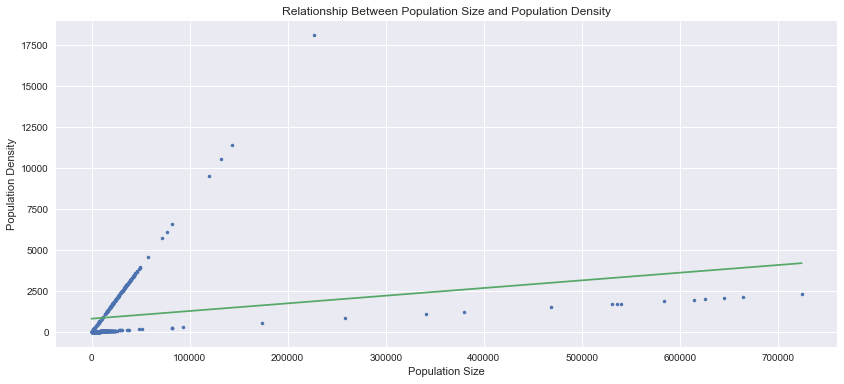

In [50]:
slope, intercept = np.polyfit(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.All_Population_Density_2015, 1)
x_range = range(max(zimbabwe_dhs.All_Population_Count_2015.astype(int)))
_ = plt.figure(figsize=(14,6))
_ = plt.plot(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.All_Population_Density_2015, linestyle='none', marker='.')
_ = plt.plot(x_range, slope*x_range + intercept)
_ = plt.title('Relationship Between Population Size and Population Density')
_ = plt.xlabel('Population Size')
_ = plt.ylabel('Population Density')
print('Correlation: ', np.corrcoef(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.All_Population_Density_2015)[0][1])
_ = plt.savefig('figures/18_corr_population_size_density')

## Population and Poverty

### Population vs Poverty Intensity
Rural Areas (Lower Populations) Tend to Have Higher Amounts of Poverty

Correlation:  -0.12375603020770824


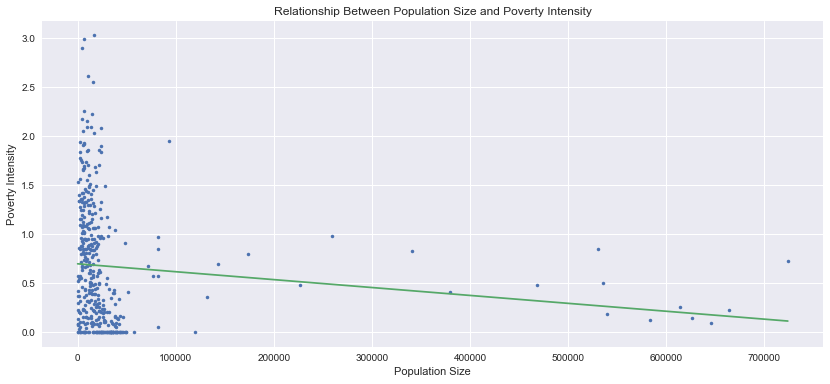

In [52]:
slope, intercept = np.polyfit(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.total_poverty_intensity, 1)
x_range = range(max(zimbabwe_dhs.All_Population_Count_2015.astype(int)))
_ = plt.figure(figsize=(14,6))
_ = plt.plot(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.total_poverty_intensity, linestyle='none', marker='.')
_ = plt.plot(x_range, slope*x_range + intercept)
_ = plt.title('Relationship Between Population Size and Poverty Intensity')
_ = plt.xlabel('Population Size')
_ = plt.ylabel('Poverty Intensity')
print('Correlation: ', np.corrcoef(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.total_poverty_intensity)[0][1])
_ = plt.savefig('figures/19_corr_population_size_poverty')

### Population vs Deprivation
Like the previous plot: Rural Areas (Lower Populations) Tend to Have Higher Levels of Deprivation

Correlation:  -0.09686836480691521


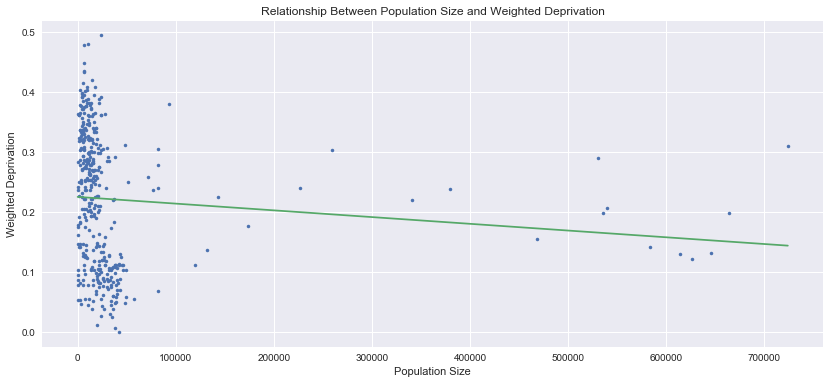

In [53]:
slope, intercept = np.polyfit(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.total_of_weighted_deprivations, 1)
x_range = range(max(zimbabwe_dhs.All_Population_Count_2015.astype(int)))
_ = plt.figure(figsize=(14,6))
_ = plt.plot(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.total_of_weighted_deprivations, linestyle='none', marker='.')
_ = plt.plot(x_range, slope*x_range + intercept)
_ = plt.title('Relationship Between Population Size and Weighted Deprivation')
_ = plt.xlabel('Population Size')
_ = plt.ylabel('Weighted Deprivation')
print('Correlation: ', np.corrcoef(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.total_of_weighted_deprivations)[0][1])
_ = plt.savefig('figures/20_corr_population_size_weighted_depriv')

## Population and Geography

### Population vs Proximity to National Borders
Large Cities are Closer to National Borders

Correlation:  0.20828717137167244


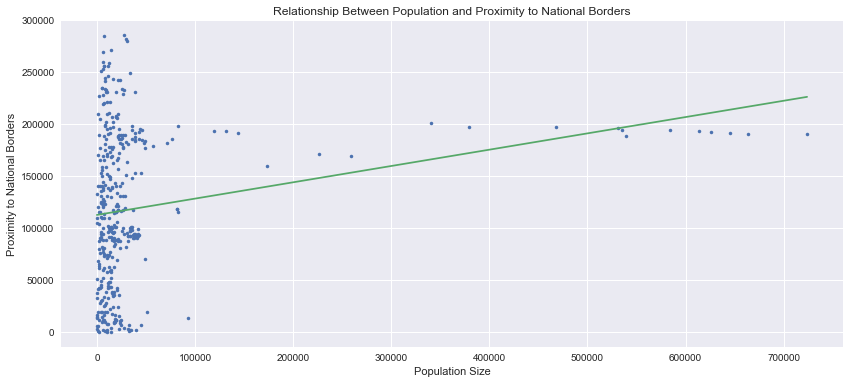

In [54]:
slope, intercept = np.polyfit(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Proximity_to_National_Borders, 1)
x_range = range(max(zimbabwe_dhs.All_Population_Count_2015.astype(int)))
_ = plt.figure(figsize=(14,6))
_ = plt.plot(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Proximity_to_National_Borders, linestyle='none', marker='.')
_ = plt.plot(x_range, slope*x_range + intercept)
_ = plt.title('Relationship Between Population and Proximity to National Borders')
_ = plt.xlabel('Population Size')
_ = plt.ylabel('Proximity to National Borders')
print('Correlation: ', np.corrcoef(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Proximity_to_National_Borders)[0][1])
_ = plt.savefig('figures/21_corr_population_size_proximity_borders')

### Population vs Proximity to Protected Areas
Large Cities are Closer to National Borders

Correlation:  0.2716263848583126


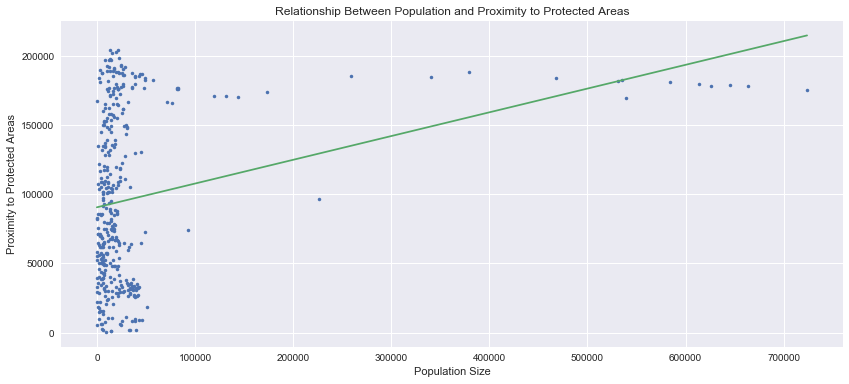

In [55]:
slope, intercept = np.polyfit(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Proximity_to_Protected_Areas, 1)
x_range = range(max(zimbabwe_dhs.All_Population_Count_2015.astype(int)))
_ = plt.figure(figsize=(14,6))
_ = plt.plot(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Proximity_to_Protected_Areas, linestyle='none', marker='.')
_ = plt.plot(x_range, slope*x_range + intercept)
_ = plt.title('Relationship Between Population and Proximity to Protected Areas')
_ = plt.xlabel('Population Size')
_ = plt.ylabel('Proximity to Protected Areas')
print('Correlation: ', np.corrcoef(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Proximity_to_Protected_Areas)[0][1])
_ = plt.savefig('figures/22_corr_population_size_proximity_protected_areas')

### Population vs Proximity to Water
Large Cities are Closer to National Borders

Correlation:  0.22337097652457572


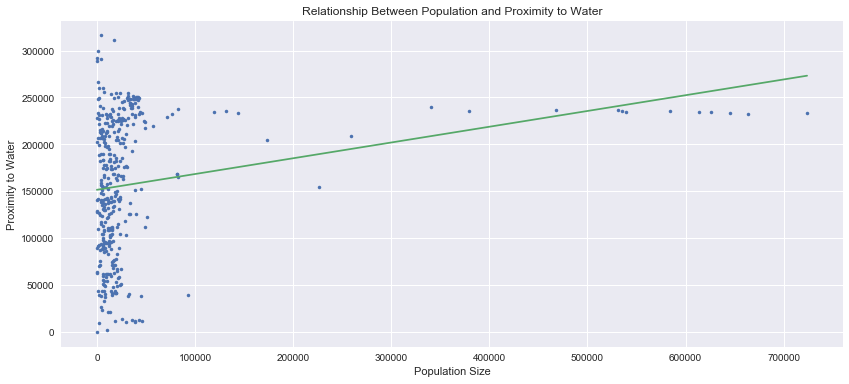

In [56]:
slope, intercept = np.polyfit(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Proximity_to_Water, 1)
x_range = range(max(zimbabwe_dhs.All_Population_Count_2015.astype(int)))
_ = plt.figure(figsize=(14,6))
_ = plt.plot(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Proximity_to_Water, linestyle='none', marker='.')
_ = plt.plot(x_range, slope*x_range + intercept)
_ = plt.title('Relationship Between Population and Proximity to Water')
_ = plt.xlabel('Population Size')
_ = plt.ylabel('Proximity to Water')
print('Correlation: ', np.corrcoef(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Proximity_to_Water)[0][1])
_ = plt.savefig('figures/23_corr_population_size_proximity_water')

## Population and Environment

### Population vs Drought Episodes
Large Populations have more Droughts

Correlation:  0.20478711088733426


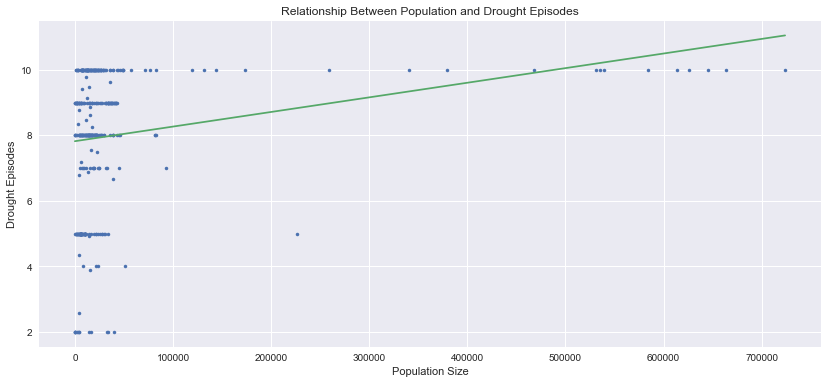

In [57]:
slope, intercept = np.polyfit(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Drought_Episodes, 1)
x_range = range(max(zimbabwe_dhs.All_Population_Count_2015.astype(int)))
_ = plt.figure(figsize=(14,6))
_ = plt.plot(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Drought_Episodes, linestyle='none', marker='.')
_ = plt.plot(x_range, slope*x_range + intercept)
_ = plt.title('Relationship Between Population and Drought Episodes')
_ = plt.xlabel('Population Size')
_ = plt.ylabel('Drought Episodes')
print('Correlation: ', np.corrcoef(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Drought_Episodes)[0][1])
_ = plt.savefig('figures/24_corr_population_size_drought')

### Population vs Growing Season Length

Correlation:  0.14347638018993566


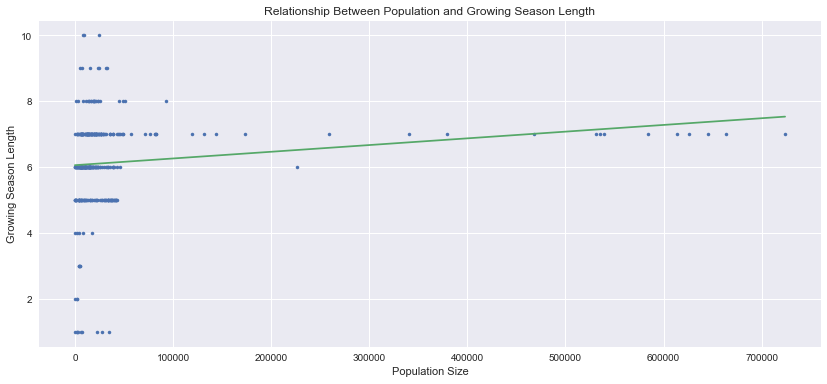

In [58]:
slope, intercept = np.polyfit(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Growing_Season_Length, 1)
x_range = range(max(zimbabwe_dhs.All_Population_Count_2015.astype(int)))
_ = plt.figure(figsize=(14,6))
_ = plt.plot(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Growing_Season_Length, linestyle='none', marker='.')
_ = plt.plot(x_range, slope*x_range + intercept)
_ = plt.title('Relationship Between Population and Growing Season Length')
_ = plt.xlabel('Population Size')
_ = plt.ylabel('Growing Season Length')
print('Correlation: ', np.corrcoef(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Growing_Season_Length)[0][1])
_ = plt.savefig('figures/25_corr_population_size_growing_season')

### Population vs Global Human Footprint

Correlation:  0.2188803525112074


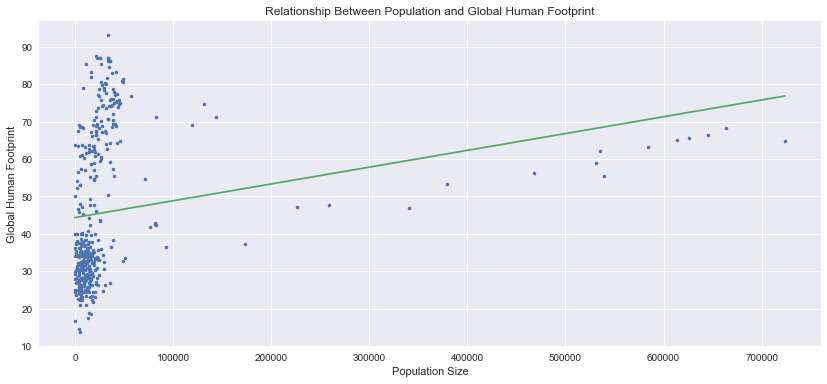

In [59]:
slope, intercept = np.polyfit(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Global_Human_Footprint, 1)
x_range = range(max(zimbabwe_dhs.All_Population_Count_2015.astype(int)))
_ = plt.figure(figsize=(14,6))
_ = plt.plot(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Global_Human_Footprint, linestyle='none', marker='.')
_ = plt.plot(x_range, slope*x_range + intercept)
_ = plt.title('Relationship Between Population and Global Human Footprint')
_ = plt.xlabel('Population Size')
_ = plt.ylabel('Global Human Footprint')
print('Correlation: ', np.corrcoef(zimbabwe_dhs.All_Population_Count_2015, zimbabwe_dhs.Global_Human_Footprint)[0][1])
_ = plt.savefig('figures/26_corr_population_size_human_footprint')

# c) ITN Coverage

### ITN Coverage Change vs Malaria Change

Correlation:  0.312289123111201


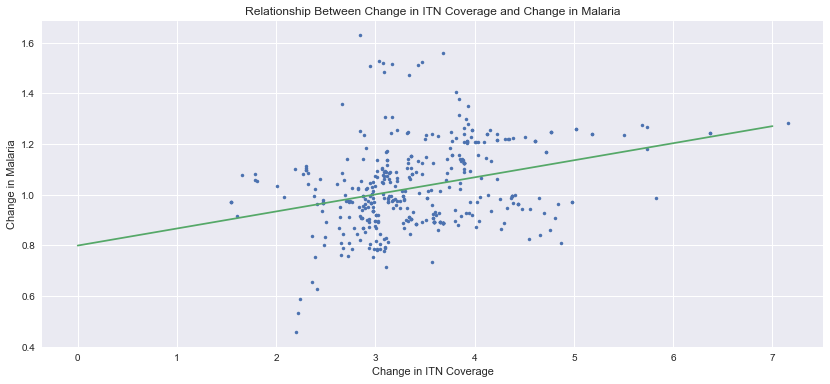

In [61]:
slope, intercept = np.polyfit(zimbabwe_dhs.itn_coverage_change_2010_2015, zimbabwe_dhs.malaria_change_2010_2015, 1)
x_range = range(8)
_ = plt.figure(figsize=(14,6))
_ = plt.plot(zimbabwe_dhs.itn_coverage_change_2010_2015, zimbabwe_dhs.malaria_change_2010_2015, linestyle='none', marker='.')
_ = plt.plot(x_range, slope*x_range + intercept)
_ = plt.title('Relationship Between Change in ITN Coverage and Change in Malaria')
_ = plt.xlabel('Change in ITN Coverage')
_ = plt.ylabel('Change in Malaria')
print('Correlation: ', np.corrcoef(zimbabwe_dhs.itn_coverage_change_2010_2015, zimbabwe_dhs.malaria_change_2010_2015)[0][1])
_ = plt.savefig('figures/27_corr_itn_coverage_malaria')

Correlation:  -0.4781431811916929


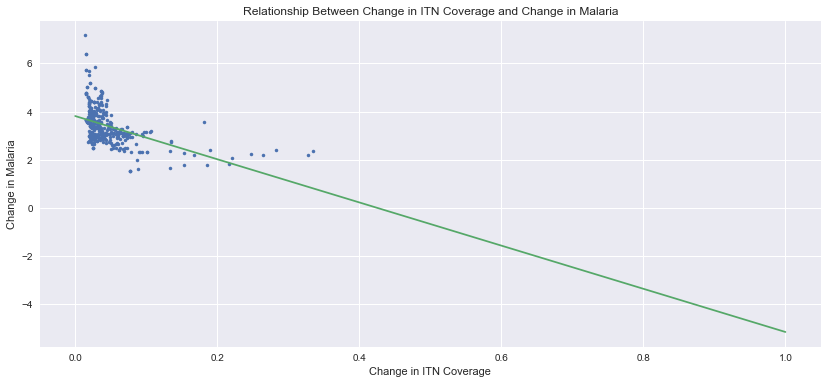

In [353]:
slope, intercept = np.polyfit(malaria_real.Malaria_2010, malaria_real.itn_coverage_change_2010_2015, 1)
x_range = range(2)
_ = plt.figure(figsize=(14,6))
_ = plt.plot(malaria_real.Malaria_2010, malaria_real.itn_coverage_change_2010_2015, linestyle='none', marker='.')
_ = plt.plot(x_range, slope*x_range + intercept)
_ = plt.title('Relationship Between Change in ITN Coverage and Change in Malaria')
_ = plt.xlabel('Change in ITN Coverage')
_ = plt.ylabel('Change in Malaria')
print('Correlation: ', np.corrcoef(malaria_real.Malaria_2010, malaria_real.itn_coverage_change_2010_2015)[0][1])

# d) Deprivation

### Poverty Intensity vs Deprivation Index
Poverty and Deprivation are correlated

Correlation:  0.8988425242663446


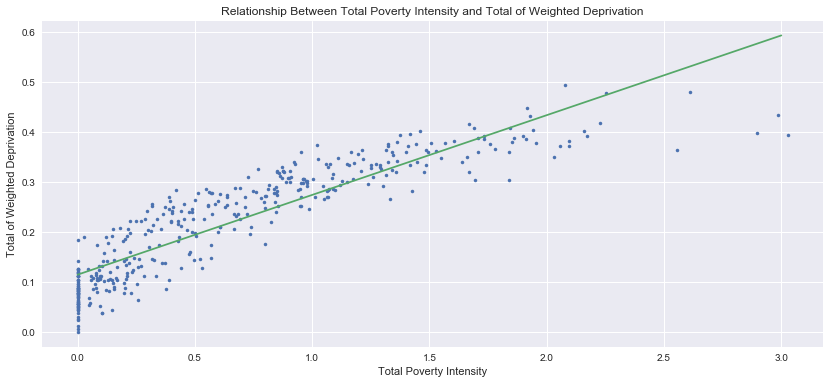

In [62]:
slope, intercept = np.polyfit(zimbabwe_dhs.total_poverty_intensity, zimbabwe_dhs.total_of_weighted_deprivations, 1)
x_range = range(4)
_ = plt.figure(figsize=(14,6))
_ = plt.plot(zimbabwe_dhs.total_poverty_intensity, zimbabwe_dhs.total_of_weighted_deprivations, linestyle='none', marker='.')
_ = plt.plot(x_range, slope*x_range + intercept)
_ = plt.title('Relationship Between Total Poverty Intensity and Total of Weighted Deprivation')
_ = plt.xlabel('Total Poverty Intensity')
_ = plt.ylabel('Total of Weighted Deprivation')
print('Correlation: ', np.corrcoef(zimbabwe_dhs.total_poverty_intensity, zimbabwe_dhs.total_of_weighted_deprivations)[0][1])
_ = plt.savefig('figures/28_corr_poverty_weighted_depriv')

## Deprivation Correlations
All Deprivation is Correlated.  Poverty Means Higher Deprivation in all Aspects.

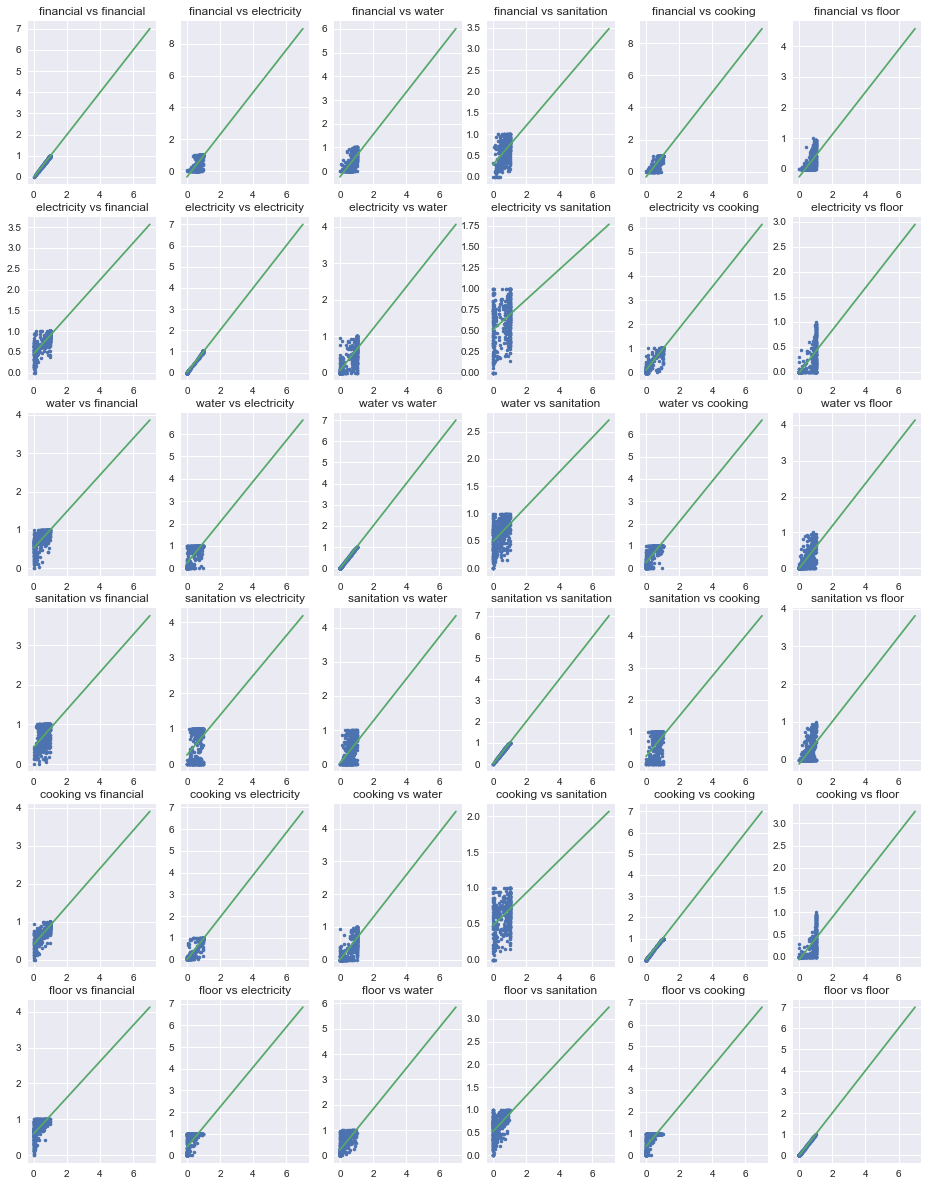

In [151]:
deprivation = ['financial_depriv', 'electricity_depriv', 'water_depriv',\
               'sanitation_depriv', 'cooking_fuel_depriv', 'floor_depriv']

_ = plt.figure(figsize=(16,21))
position = 1
for x in range(len(deprivation)):
    row = deprivation[x]
    for y in range(len(deprivation)):
        column = deprivation[y]
        slope, intercept = np.polyfit(zimbabwe_dhs[row], zimbabwe_dhs[column], 1)
        x_range = range(8)
        _ = plt.subplot(6,6, position)
        _ = plt.plot(zimbabwe_dhs[row], zimbabwe_dhs[column], linestyle='none', marker='.')
        _ = plt.plot(x_range, slope*x_range + intercept)
        _ = plt.title(row.split('_')[0] + ' vs ' + column.split('_')[0])
        position = position + 1
        
_ = plt.savefig('figures/29_corr_depriv')

## Functions For Statistical Analysis

In [64]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [65]:
#Bootstrap Data
def bootstrap_replicate_1d(data, func):
    """Returns Single Bootstrap Replicate"""
    return func(np.random.choice(data, size=len(data)))

#Repeat bootstrap x amount of times based on size
def draw_bs_reps(data, func, size=1):
    """Bootstrap Replicates for function func and size size"""
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

In [66]:
def diff_of_means(data1, data2):
    """Difference of Means"""
    return np.mean(data1) - np.mean(data2)

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data1, data2, func, size=1):
    """Permutation Replicates for function func and size size"""
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data1, data2)
        
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates

# Question: Why is it split in electricity and cooking fuel deprivation? What factors relate to this? What can be done?

# 1) What Impacts Electricity Deprivation Most?
## Understranding Electricity Deprivation

### Observation: Large clusters at 0 and 1.  There is a split between availability of Electricity by DHS.

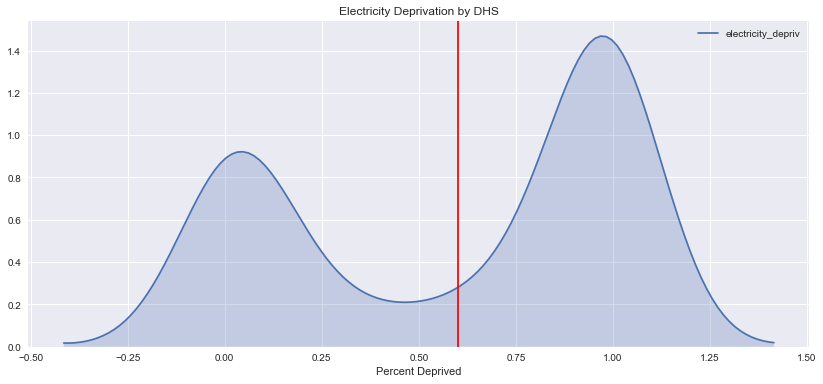

In [67]:
_ = plt.figure(figsize=(14,6))
_ = sns.kdeplot(zimbabwe_dhs.electricity_depriv, shade=True)
_ = plt.axvline(np.mean(zimbabwe_dhs.electricity_depriv), color='red')
_ = plt.title('Electricity Deprivation by DHS')
_ = plt.xlabel('Percent Deprived')
_ = plt.savefig('figures/30_electric_depriv')

### Split and observe DHS's independently

In [68]:
high_electricity_depriv = zimbabwe_dhs[zimbabwe_dhs.electricity_depriv == 1]
no_electricity_depriv = zimbabwe_dhs[zimbabwe_dhs.electricity_depriv < 0.1]

In [69]:
high_electricity_depriv.shape

(156, 50)

In [70]:
no_electricity_depriv.shape

(110, 50)

### Comparing Averages of Variables: 
### DHSs w/ High Electricity Deprivation vs DHSs w/ Low Electricty Deprivation

In [71]:
def get_change(row):
    current = row.no_electric_ave
    previous = row.high_electric_ave
    if current == previous:
        return 100.0
    try:
        return (abs(current - previous) / previous) * 100.0
    except ZeroDivisionError:
        return 0

In [72]:
#Average All Variables of DHSs with No Electricity Deprivation
no_electricity_depriv_averages = pd.DataFrame(no_electricity_depriv.mean()).reset_index()
no_electricity_depriv_averages.columns = ['variable','no_electric_ave']

#Average All Variables of DHSs with High Electricity Deprivation
high_electricity_depriv_averages = pd.DataFrame(high_electricity_depriv.mean()).reset_index()
high_electricity_depriv_averages.columns = ['variable','high_electric_ave']

#Merge Tables for comparison
electric_depriv_averages = no_electricity_depriv_averages.merge(high_electricity_depriv_averages)

#Calculate Difference of Variables
electric_depriv_averages['mean_differences'] = abs(electric_depriv_averages['no_electric_ave'] - electric_depriv_averages['high_electric_ave'])
electric_depriv_averages['perc_change'] = electric_depriv_averages.apply(get_change, axis=1)

### Top 15 Variables by Percent Change of Means (No vs High Electricity Deprivation)

In [73]:
electric_depriv_averages[electric_depriv_averages.variable.isin(deprivation) == False].sort_values('perc_change', ascending=False).head(15)

,variable,no_electric_ave,high_electric_ave,mean_differences,perc_change
16,Nightlights_Composite,3.838927,0.174147,3.664780,2104.421067
6,BUILT_Population_2014,0.298641,0.027621,0.271019,981.197320
4,All_Population_Density_2015,2203.237421,213.753288,1989.484134,930.738495
3,All_Population_Density_2010,1973.176728,191.434631,1781.742098,930.731336
10,Global_Human_Footprint,68.121564,33.082097,35.039467,105.916706
35,woman_15_to_49,1.000000,1.000000,0.000000,100.000000
42,total_poverty_intensity,0.093625,1.162905,1.069280,91.949082
41,headcount_poor,0.230342,2.420275,2.189933,90.482820
36,child_not_in_school,0.006584,0.054425,0.047842,87.903138
38,school_attendance_depriv,0.006584,0.054425,0.047842,87.903138


## a) Population by Electricity Deprivation

### ECDF

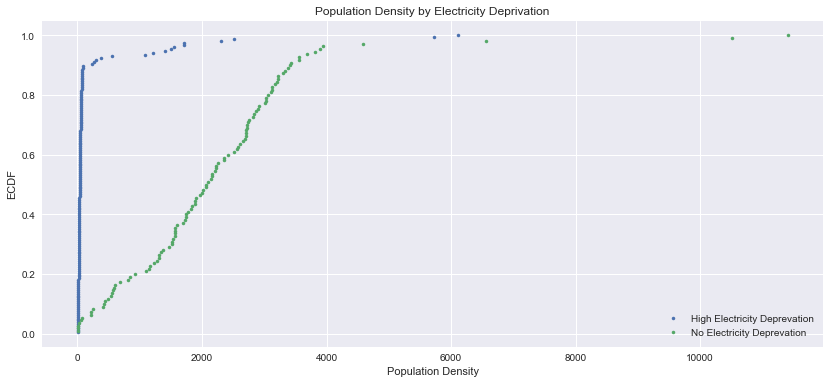

In [76]:
x_pop_high, y_pop_high = ecdf(high_electricity_depriv.All_Population_Density_2015)
x_pop_no, y_pop_no = ecdf(no_electricity_depriv.All_Population_Density_2015)

_ = plt.figure(figsize=(14,6))
_ = plt.plot(x_pop_high, y_pop_high, linestyle='none', marker='.')
_ = plt.plot(x_pop_no, y_pop_no, linestyle='none', marker='.')
_ = plt.title('Population Density by Electricity Deprivation')
_ = plt.legend(['High Electricity Deprevation','No Electricity Deprevation'])
_ = plt.xlabel('Population Density')
_ = plt.ylabel('ECDF')
_ = plt.savefig('figures/32_electric_depriv_pop_density')

### Bootstrap Densities
<strong>Significant Difference</strong> Between Population Densities in High and Low Electricity Deprived Areas.

In [79]:
#Bootstrap Density Distributions of Data
bs_reps_pop_high_electric_depriv = draw_bs_reps(high_electricity_depriv.All_Population_Density_2015, np.mean, 1000)
bs_reps_pop_low_electric_depriv = draw_bs_reps(no_electricity_depriv.All_Population_Density_2015, np.mean, 1000)

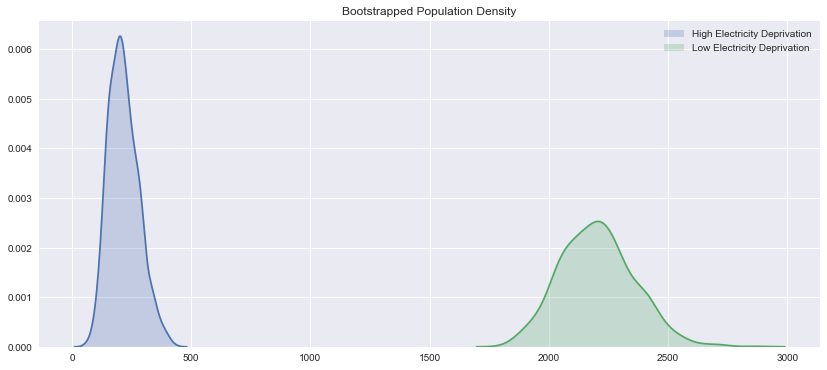

In [80]:
_ = plt.figure(figsize=(14,6))
_ = sns.kdeplot(bs_reps_pop_high_electric_depriv, shade=True)
_ = sns.kdeplot(bs_reps_pop_low_electric_depriv, shade=True)
_ = plt.title('Bootstrapped Population Density')
_ = plt.legend(['High Electricity Deprivation','Low Electricity Deprivation'])
_ = plt.savefig('figures/33_electric_depriv_pop_density_bs')

### Bootstrap Mean & 95% Confidence Interval

In [81]:
print('High Electricity Deprivation Bootstrap Mean: ', np.mean(bs_reps_pop_high_electric_depriv))
print('High Electricity Deprivation (95% Conf. Int): ', np.percentile(bs_reps_pop_high_electric_depriv, [2.5,97.5]))
print('')
print('Low Electricity Deprivation Bootstrap Mean: ', np.mean(bs_reps_pop_low_electric_depriv))
print('Low Electricity Deprivation (95% Conf. Int): ', np.percentile(bs_reps_pop_low_electric_depriv, [2.5,97.5]))

High Electricity Deprivation Bootstrap Mean:  217.04806477023445
High Electricity Deprivation (95% Conf. Int):  [113.65056045 357.42331357]

Low Electricity Deprivation Bootstrap Mean:  2204.2386730090575
Low Electricity Deprivation (95% Conf. Int):  [1917.62665154 2518.32352566]


### Hypothesis Testing (Permutation Testing)
- <strong>Null Hypothesis: </strong> No Difference in Density between High and Low Electricity Deprivation.
- <strong>Alternative Hypothesis: </strong> Difference in Density Between High and Low Electicity Deprivation.

### True Difference Of Means

In [82]:
true_pop_diff_of_means = np.mean(no_electricity_depriv.All_Population_Density_2015) - np.mean(high_electricity_depriv.All_Population_Density_2015)
print("True Difference Of Means: ", true_pop_diff_of_means)

True Difference Of Means:  1989.4841335557114


### Permutation Difference Of Means

In [83]:
pop_density_perms = draw_perm_reps(no_electricity_depriv.All_Population_Density_2015, high_electricity_depriv.All_Population_Density_2015, diff_of_means, 10000)

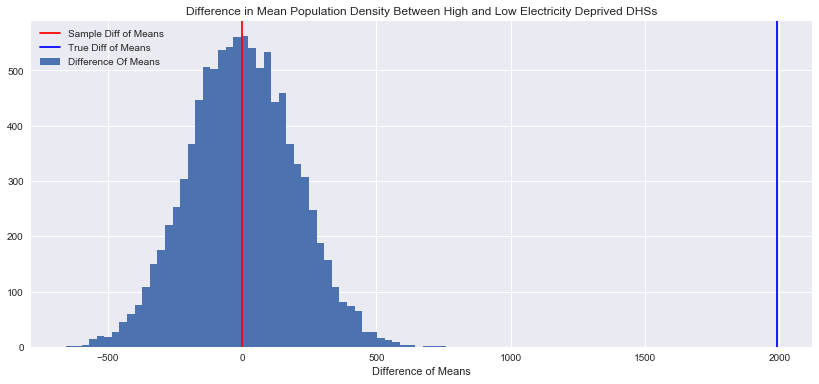

In [84]:
_ = plt.figure(figsize=(14,6))
_ = plt.hist(pop_density_perms, bins=50)
_ = plt.axvline(np.mean(pop_density_perms), color='red')
_ = plt.axvline(true_pop_diff_of_means, color='blue')
_ = plt.title('Difference in Mean Population Density Between High and Low Electricity Deprived DHSs')
_ = plt.legend(('Sample Diff of Means','True Diff of Means','Difference Of Means'))
_ = plt.xlabel('Difference of Means')
_ = plt.savefig('figures/34_electric_depriv_pop_density_diff_means')

### P-Value
The Probability of the True Difference Occuring At Random.

In [85]:
print('P-Value: ', np.sum(pop_density_perms > true_pop_diff_of_means) / len(pop_density_perms))

P-Value:  0.0


### Conclusion
We <strong>reject the null hypothesis</strong> and conclude that <strong>there is a statistically significant difference</strong> between the population density of DHS with high electricity deprivation and low electricity deprivation because of the low p-value (p-value is near 0).

## b) Poverty by Electricity Deprivation

### ECDF

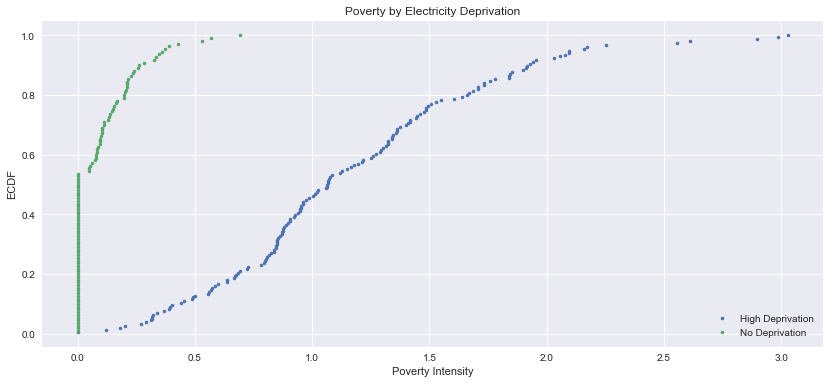

In [86]:
x_pov_high, y_pov_high = ecdf(high_electricity_depriv.total_poverty_intensity)
x_pov_no, y_pov_no = ecdf(no_electricity_depriv.total_poverty_intensity)

_ = plt.figure(figsize=(14,6))
_ = plt.plot(x_pov_high, y_pov_high, linestyle='none', marker='.')
_ = plt.plot(x_pov_no, y_pov_no, linestyle='none', marker='.')
_ = plt.title('Poverty by Electricity Deprivation')
_ = plt.legend(['High Deprivation','No Deprivation'])
_ = plt.xlabel('Poverty Intensity')
_ = plt.ylabel('ECDF')
_ = plt.savefig('figures/35_electric_depriv_poverty')

### Bootstrap Poverty
<strong>Significant Difference</strong> Between Population Densities in High and Low Electricity Deprived Areas.

In [88]:
#Bootstrap Density Distributions of Data
bs_reps_pov_high_electric_depriv = draw_bs_reps(high_electricity_depriv.total_poverty_intensity, np.mean, 1000)
bs_reps_pov_low_electric_depriv = draw_bs_reps(no_electricity_depriv.total_poverty_intensity, np.mean, 1000)

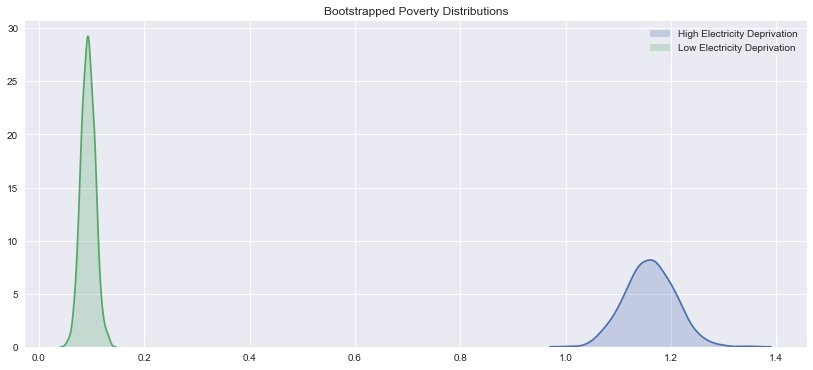

In [93]:
_ = plt.figure(figsize=(14,6))
_ = sns.kdeplot(bs_reps_pov_high_electric_depriv, shade=True)
_ = sns.kdeplot(bs_reps_pov_low_electric_depriv, shade=True)
_ = plt.title('Bootstrapped Poverty Distributions')
_ = plt.legend(['High Electricity Deprivation','Low Electricity Deprivation'])
_ = plt.savefig('figures/36_electric_depriv_poverty_bs')

### Bootstrap Mean & 95% Confidence Interval

In [90]:
print('High Electricity Deprivation Bootstrap Mean: ', np.mean(bs_reps_pov_high_electric_depriv))
print('High Electricity Deprivation (95% Conf. Int): ', np.percentile(bs_reps_pov_high_electric_depriv, [2.5,97.5]))
print('')
print('Low Electricity Deprivation Bootstrap Mean: ', np.mean(bs_reps_pov_low_electric_depriv))
print('Low Electricity Deprivation (95% Conf. Int): ', np.percentile(bs_reps_pov_low_electric_depriv, [2.5,97.5]))

High Electricity Deprivation Bootstrap Mean:  1.160729230991965
High Electricity Deprivation (95% Conf. Int):  [1.07112889 1.25323235]

Low Electricity Deprivation Bootstrap Mean:  0.09359042214469501
Low Electricity Deprivation (95% Conf. Int):  [0.06757626 0.1206836 ]


### Hypothesis Testing (Permutation Testing)
- <strong>Null Hypothesis: </strong> No Difference in Poverty Intensity between High and Low Electricity Deprivation.
- <strong>Alternative Hypothesis: </strong> Difference in Poverty Density Between High and Low Electicity Deprivation.

### True Difference Of Means

In [91]:
true_pov_diff_of_means = np.mean(no_electricity_depriv.total_poverty_intensity) - np.mean(high_electricity_depriv.total_poverty_intensity)
print("True Difference Of Means: ", true_pov_diff_of_means)

True Difference Of Means:  -1.069280292825489


### Permutation Difference Of Means

In [92]:
pov_density_perms = draw_perm_reps(no_electricity_depriv.total_poverty_intensity, high_electricity_depriv.total_poverty_intensity, diff_of_means, 10000)

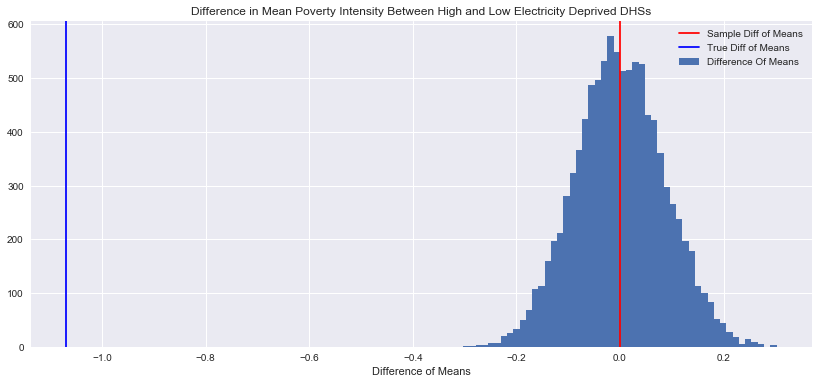

In [100]:
_ = plt.figure(figsize=(14,6))
_ = plt.hist(pov_density_perms, bins=50)
_ = plt.axvline(np.mean(pov_density_perms), color='red')
_ = plt.axvline(true_pov_diff_of_means, color='blue')
_ = plt.title('Difference in Mean Poverty Intensity Between High and Low Electricity Deprived DHSs')
_ = plt.legend(('Sample Diff of Means','True Diff of Means','Difference Of Means'))
_ = plt.xlabel('Difference of Means')
_ = plt.savefig('figures/37_electric_depriv_poverty_diff_means')

### P-Value
The Probability of the True Difference of Poverty Occuring At Random.

In [101]:
print('P-Value: ', np.sum(pov_density_perms < true_pov_diff_of_means) / len(pov_density_perms))

P-Value:  0.0


### Conclusion
We <strong>reject the null hypothesis</strong> and conclude that <strong>there is statistically significant difference</strong> between the poverty intensity of DHS with high electricity deprivation and low electricity deprivation because of the low p-value (p-value is near 0).

# c) Population Size and Electricity Deprivation

### ECDF

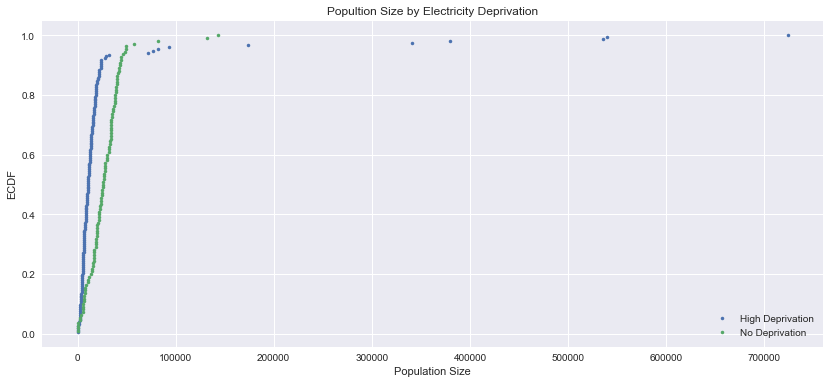

In [102]:
x_pop_size_high, y_pop_size_high = ecdf(high_electricity_depriv.All_Population_Count_2015)
x_pop_size_no, y_pop_size_no = ecdf(no_electricity_depriv.All_Population_Count_2015)

_ = plt.figure(figsize=(14,6))
_ = plt.plot(x_pop_size_high, y_pop_size_high, linestyle='none', marker='.')
_ = plt.plot(x_pop_size_no, y_pop_size_no, linestyle='none', marker='.')
_ = plt.title('Popultion Size by Electricity Deprivation')
_ = plt.legend(['High Deprivation','No Deprivation'])
_ = plt.xlabel('Population Size')
_ = plt.ylabel('ECDF')
_ = plt.savefig('figures/38_electric_depriv_pop_size')

### Bootstrap Population Size
<strong>Significant Difference</strong> Between Population Size in High and Low Electricity Deprived Areas.

In [103]:
#Bootstrap Density Distributions of Data
bs_reps_pop_size_high_electric_depriv = draw_bs_reps(high_electricity_depriv.All_Population_Count_2015, np.mean, 1000)
bs_reps_pop_size_low_electric_depriv = draw_bs_reps(no_electricity_depriv.All_Population_Count_2015, np.mean, 1000)

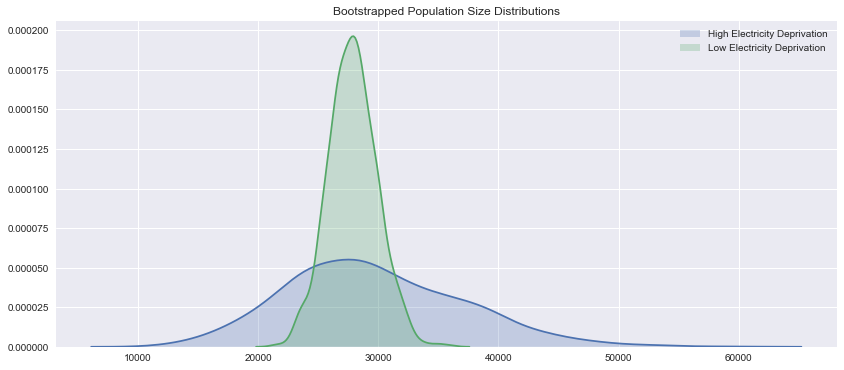

In [105]:
_ = plt.figure(figsize=(14,6))
_ = sns.kdeplot(bs_reps_pop_size_high_electric_depriv, shade=True)
_ = sns.kdeplot(bs_reps_pop_size_low_electric_depriv, shade=True)
_ = plt.title('Bootstrapped Population Size Distributions')
_ = plt.legend(['High Electricity Deprivation','Low Electricity Deprivation'])
_ = plt.savefig('figures/39_electric_depriv_pop_size_bs')

### Bootstrap Mean & 95% Confidence Interval

In [106]:
print('High Electricity Deprivation Bootstrap Mean: ', np.mean(bs_reps_pop_size_high_electric_depriv))
print('High Electricity Deprivation (95% Conf. Int): ', np.percentile(bs_reps_pop_size_high_electric_depriv, [2.5,97.5]))
print('')
print('Low Electricity Deprivation Bootstrap Mean: ', np.mean(bs_reps_pop_size_low_electric_depriv))
print('Low Electricity Deprivation (95% Conf. Int): ', np.percentile(bs_reps_pop_size_low_electric_depriv, [2.5,97.5]))

High Electricity Deprivation Bootstrap Mean:  29655.85376836195
High Electricity Deprivation (95% Conf. Int):  [17155.68853833 45237.74423784]

Low Electricity Deprivation Bootstrap Mean:  27883.91046572503
Low Electricity Deprivation (95% Conf. Int):  [23840.65489643 32057.99721737]


### Hypothesis Testing (Permutation Testing)
- <strong>Null Hypothesis: </strong> No Difference in Population Size between High and Low Electricity Deprivation.
- <strong>Alternative Hypothesis: </strong> Difference in Population Size Between High and Low Electicity Deprivation.

### True Difference Of Means

In [107]:
true_pop_size_diff_of_means = np.mean(no_electricity_depriv.All_Population_Count_2015) - np.mean(high_electricity_depriv.All_Population_Count_2015)
print("True Difference Of Means: ", true_pop_size_diff_of_means)

True Difference Of Means:  -1661.9054912353204


### Permutation Difference Of Means

In [108]:
pop_size_perms = draw_perm_reps(no_electricity_depriv.All_Population_Count_2015, high_electricity_depriv.All_Population_Count_2015, diff_of_means, 10000)

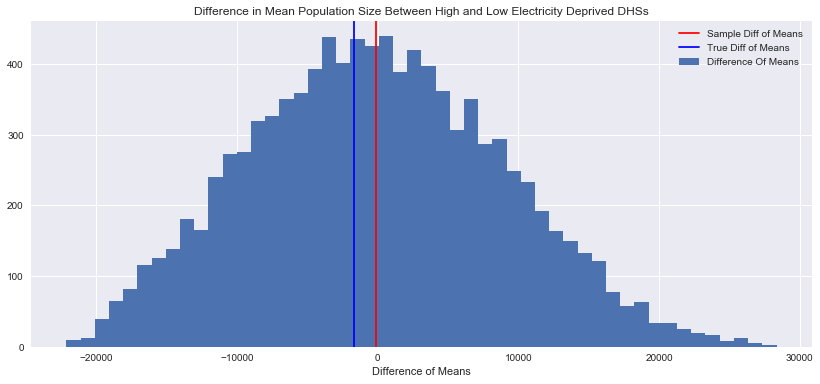

In [109]:
_ = plt.figure(figsize=(14,6))
_ = plt.hist(pop_size_perms, bins=50)
_ = plt.axvline(np.mean(pop_size_perms), color='red')
_ = plt.axvline(true_pop_size_diff_of_means, color='blue')
_ = plt.title('Difference in Mean Population Size Between High and Low Electricity Deprived DHSs')
_ = plt.legend(('Sample Diff of Means','True Diff of Means','Difference Of Means'))
_ = plt.xlabel('Difference of Means')
_ = plt.savefig('figures/40_electric_depriv_pop_size_diff_means')

### P-Value
The Probability of the True Difference of Population Size Occuring At Random.

In [110]:
print('P-Value: ', np.sum(pop_size_perms < true_pop_size_diff_of_means) / len(pop_size_perms))

P-Value:  0.4424


### Conclusion
We <strong>accept the null hypothesis</strong> and conclude that <strong>there is no statistically significant difference</strong> between the population size of DHS with high electricity deprivation and low electricity deprivation because p-value > 0.05.

## The Question: 
- ## What Impacts Electricity Deprivation Most?

## Answer:  
- #### Poverty and Population Density both play "significant" parts in electricity deprivation.
- #### Population Size does not matter

# 2) What Impacts Cooking Fuel Deprivation Most?
## Understanding Cooking Fuel Deprivation

### Observation: Large clusters at 0 and 1.  There is a split between availability of Cooking Fuel by DHS.

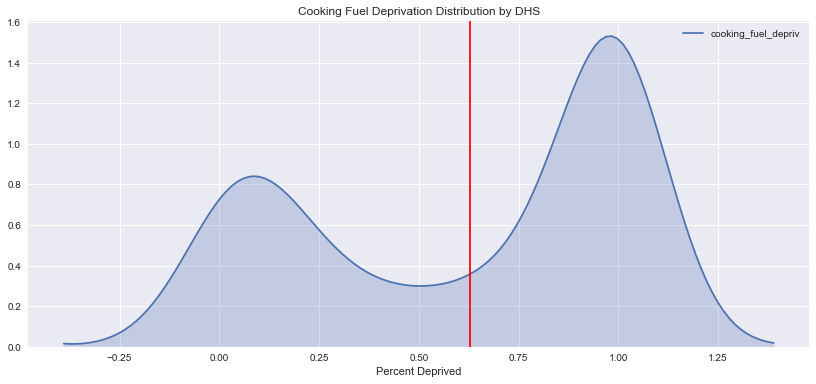

In [112]:
_ = plt.figure(figsize=(14,6))
_ = sns.kdeplot(zimbabwe_dhs.cooking_fuel_depriv, shade=True)
_ = plt.axvline(np.mean(zimbabwe_dhs.cooking_fuel_depriv), color='red')
_ = plt.title('Cooking Fuel Deprivation Distribution by DHS')
_ = plt.xlabel('Percent Deprived')
_ = plt.savefig('figures/41_cooking_depriv')

### Split and observe DHS's independently

In [113]:
high_cooking_fuel_depriv = zimbabwe_dhs[zimbabwe_dhs.cooking_fuel_depriv == 1]
low_cooking_fuel_depriv = zimbabwe_dhs[zimbabwe_dhs.cooking_fuel_depriv < 0.2]

In [114]:
high_cooking_fuel_depriv.shape

(168, 50)

In [115]:
low_cooking_fuel_depriv.shape

(111, 50)

### Comparing Averages of Variables: 
### DHSs w/ High Electricity Deprivation vs DHSs w/ Low Electricty Deprivation

In [116]:
def get_change_cooking(row):
    current = row.low_cooking_ave
    previous = row.high_cooking_ave
    if current == previous:
        return 100.0
    try:
        return (abs(current - previous) / previous) * 100.0
    except ZeroDivisionError:
        return 0

In [117]:
#Average All Variables of DHSs with No Electricity Deprivation
low_cooking_depriv_averages = pd.DataFrame(low_cooking_fuel_depriv.mean()).reset_index()
low_cooking_depriv_averages.columns = ['variable','low_cooking_ave']

#Average All Variables of DHSs with High Electricity Deprivation
high_cooking_depriv_averages = pd.DataFrame(high_cooking_fuel_depriv.mean()).reset_index()
high_cooking_depriv_averages.columns = ['variable','high_cooking_ave']

#Merge Tables for comparison
cooking_depriv_averages = low_cooking_depriv_averages.merge(high_cooking_depriv_averages)

#Calculate Difference of Variables
cooking_depriv_averages['mean_differences'] = abs(cooking_depriv_averages['low_cooking_ave'] - cooking_depriv_averages['high_cooking_ave'])
cooking_depriv_averages['perc_change'] = cooking_depriv_averages.apply(get_change_cooking, axis=1)

### Top 15 Variables by Percent Change of Means (No vs High Cooking Fuel Deprivation)
Very Similar to Electricity

In [609]:
cooking_depriv_averages[cooking_depriv_averages.variable.isin(deprivation) == False].sort_values('perc_change', ascending=False).head(15)

,variable,low_cooking_ave,high_cooking_ave,mean_differences,perc_change
16,Nightlights_Composite,4.272195,0.014305,4.257890,29764.034737
6,BUILT_Population_2014,0.335721,0.002452,0.333269,13594.501443
3,All_Population_Density_2010,2174.178746,35.532999,2138.645747,6018.759451
4,All_Population_Density_2015,2427.668517,39.683990,2387.984527,6017.501134
1,All_Population_Count_2010,47105.689758,11118.161507,35987.528251,323.682366
2,All_Population_Count_2015,52597.256797,12417.004626,40180.252171,323.590539
10,Global_Human_Footprint,68.788489,30.831170,37.957319,123.113457
45,woman_15_to_49,1.000000,1.000000,0.000000,100.000000
27,total_poverty_intensity,0.087915,1.168588,1.080673,92.476808
47,school_attainment_depriv,0.002517,0.028131,0.025614,91.052819


## a) Population Density by Cooking Fuel Deprivation

### ECDF

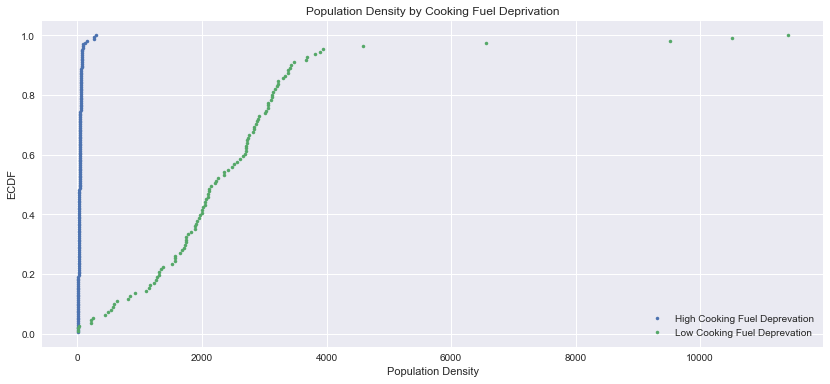

In [118]:
x_pop_cooking_high, y_pop_cooking_high = ecdf(high_cooking_fuel_depriv.All_Population_Density_2015)
x_pop_cooking_no, y_pop_cooking_no = ecdf(low_cooking_fuel_depriv.All_Population_Density_2015)

_ = plt.figure(figsize=(14,6))
_ = plt.plot(x_pop_cooking_high, y_pop_cooking_high, linestyle='none', marker='.')
_ = plt.plot(x_pop_cooking_no, y_pop_cooking_no, linestyle='none', marker='.')
_ = plt.title('Population Density by Cooking Fuel Deprivation')
_ = plt.legend(['High Cooking Fuel Deprevation','Low Cooking Fuel Deprevation'])
_ = plt.xlabel('Population Density')
_ = plt.ylabel('ECDF')
_ = plt.savefig('figures/43_cooking_depriv_pop_density')

### Bootstrap Densities
- <strong>Significant Difference</strong> Between Population Densities in High and Low Cooking Fuel Deprived Areas.
- Gap is significantly larger than that of High and Low Electricity Density.

In [119]:
#Bootstrap Density Distributions of Data
bs_reps_pop_high_cooking_depriv = draw_bs_reps(high_cooking_fuel_depriv.All_Population_Density_2015, np.mean, 1000)
bs_reps_pop_low_cooking_depriv = draw_bs_reps(low_cooking_fuel_depriv.All_Population_Density_2015, np.mean, 1000)

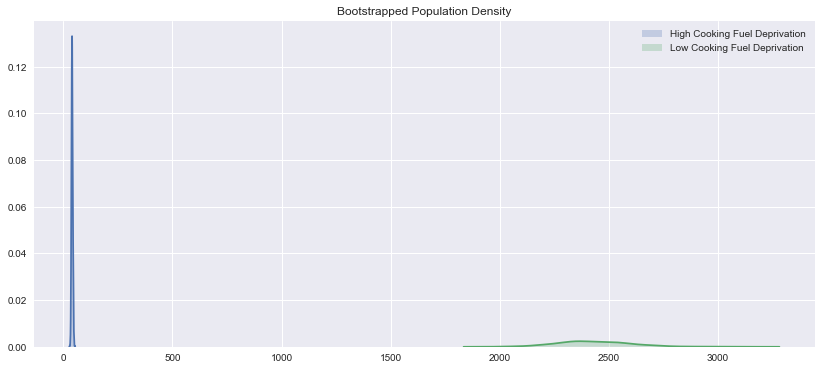

In [120]:
_ = plt.figure(figsize=(14,6))
_ = sns.kdeplot(bs_reps_pop_high_cooking_depriv, shade=True)
_ = sns.kdeplot(bs_reps_pop_low_cooking_depriv, shade=True)
_ = plt.title('Bootstrapped Population Density')
_ = plt.legend(['High Cooking Fuel Deprivation','Low Cooking Fuel Deprivation'])
_ = plt.savefig('figures/44_cooking_depriv_pop_density_bs')

### Bootstrap Mean & 95% Confidence Interval

In [121]:
print('High Cooking Fuel Deprivation Bootstrap Mean: ', np.mean(bs_reps_pop_high_cooking_depriv))
print('High Cooking Fuel Deprivation (95% Conf. Int): ', np.percentile(bs_reps_pop_high_cooking_depriv, [2.5,97.5]))
print('')
print('Low Cooking Fuel Deprivation Bootstrap Mean: ', np.mean(bs_reps_pop_low_cooking_depriv))
print('Low Cooking Fuel Deprivation (95% Conf. Int): ', np.percentile(bs_reps_pop_low_cooking_depriv, [2.5,97.5]))

High Cooking Fuel Deprivation Bootstrap Mean:  39.75933594682973
High Cooking Fuel Deprivation (95% Conf. Int):  [34.10443492 45.92048625]

Low Cooking Fuel Deprivation Bootstrap Mean:  2431.9595214896312
Low Cooking Fuel Deprivation (95% Conf. Int):  [2135.10028527 2764.5480139 ]


### Hypothesis Testing (Permutation Testing)
- <strong>Null Hypothesis: </strong> No Difference in Density between High and Low Cooking Fuel Deprivation.
- <strong>Alternative Hypothesis: </strong> Difference in Density Between High and Low Cooking Fuel Deprivation.

### True Difference Of Means

In [122]:
true_pop_density_cooking_diff_of_means = np.mean(low_cooking_fuel_depriv.All_Population_Density_2015) - np.mean(high_cooking_fuel_depriv.All_Population_Density_2015)
print("True Difference Of Means: ", true_pop_density_cooking_diff_of_means)

True Difference Of Means:  2387.9845272219627


### Permutation Difference Of Means

In [123]:
pop_density_cooking_perms = draw_perm_reps(low_cooking_fuel_depriv.All_Population_Density_2015, high_cooking_fuel_depriv.All_Population_Density_2015, diff_of_means, 10000)

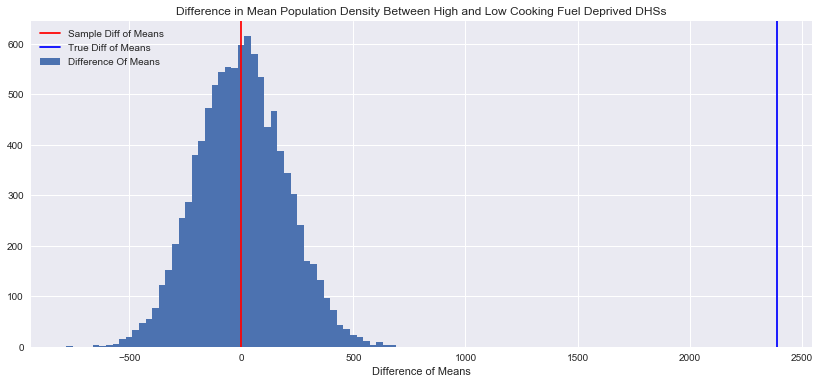

In [124]:
_ = plt.figure(figsize=(14,6))
_ = plt.hist(pop_density_cooking_perms, bins=50)
_ = plt.axvline(np.mean(pop_density_cooking_perms), color='red')
_ = plt.axvline(true_pop_density_cooking_diff_of_means, color='blue')
_ = plt.title('Difference in Mean Population Density Between High and Low Cooking Fuel Deprived DHSs')
_ = plt.legend(('Sample Diff of Means','True Diff of Means','Difference Of Means'))
_ = plt.xlabel('Difference of Means')
_ = plt.savefig('figures/45_cooking_depriv_pop_density_diff_means')

### P-Value
The Probability of the True Difference Occuring At Random.

In [125]:
print('P-Value: ', np.sum(pop_density_cooking_perms > true_pop_density_cooking_diff_of_means) / len(pop_density_cooking_perms))

P-Value:  0.0


### Conclusion
We <strong>reject the null hypothesis</strong> and conclude that <strong>there is a statistically significant difference</strong> between the population density of DHS with high cooking fuel deprivation and low cooking fuel deprivation because of the low p-value (p-value is near 0).

## b) Poverty by Cooking Fuel Deprivation

### ECDF

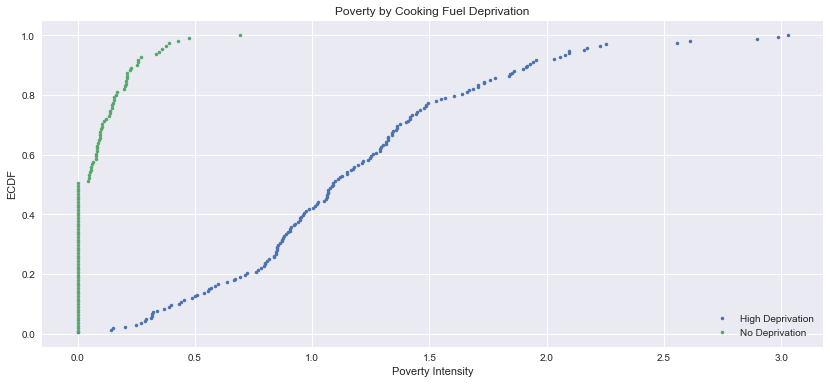

In [128]:
x_pov_cooking_high, y_pov_cooking_high = ecdf(high_cooking_fuel_depriv.total_poverty_intensity)
x_pov_cooking_no, y_pov_cooking_no = ecdf(low_cooking_fuel_depriv.total_poverty_intensity)

_ = plt.figure(figsize=(14,6))
_ = plt.plot(x_pov_cooking_high, y_pov_cooking_high, linestyle='none', marker='.')
_ = plt.plot(x_pov_cooking_no, y_pov_cooking_no, linestyle='none', marker='.')
_ = plt.title('Poverty by Cooking Fuel Deprivation')
_ = plt.legend(['High Deprivation','No Deprivation'])
_ = plt.xlabel('Poverty Intensity')
_ = plt.ylabel('ECDF')
_ = plt.savefig('figures/46_cooking_depriv_poverty')

### Bootstrap Poverty
<strong>Significant Difference</strong> Between Poverty in DHSs with High and Low Cooking Fuel Deprivation.

In [129]:
#Bootstrap Density Distributions of Data
bs_reps_pov_high_cooking_depriv = draw_bs_reps(high_cooking_fuel_depriv.total_poverty_intensity, np.mean, 1000)
bs_reps_pov_low_cookingc_depriv = draw_bs_reps(low_cooking_fuel_depriv.total_poverty_intensity, np.mean, 1000)

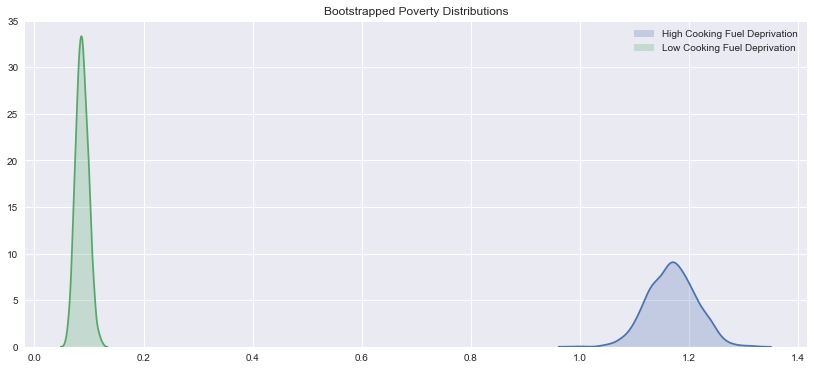

In [130]:
_ = plt.figure(figsize=(14,6))
_ = sns.kdeplot(bs_reps_pov_high_cooking_depriv, shade=True)
_ = sns.kdeplot(bs_reps_pov_low_cookingc_depriv, shade=True)
_ = plt.title('Bootstrapped Poverty Distributions')
_ = plt.legend(['High Cooking Fuel Deprivation','Low Cooking Fuel Deprivation'])
_ = plt.savefig('figures/47_cooking_depriv_poverty_bs')

### Bootstrap Mean & 95% Confidence Interval

In [131]:
print('High Cooking Fuel Deprivation Bootstrap Mean: ', np.mean(bs_reps_pov_high_cooking_depriv))
print('High Cooking Fuel Deprivation (95% Conf. Int): ', np.percentile(bs_reps_pov_high_cooking_depriv, [2.5,97.5]))
print('')
print('Low Cooking Fuel Deprivation Bootstrap Mean: ', np.mean(bs_reps_pov_low_cookingc_depriv))
print('Low Cooking Fuel Deprivation (95% Conf. Int): ', np.percentile(bs_reps_pov_low_cookingc_depriv, [2.5,97.5]))

High Cooking Fuel Deprivation Bootstrap Mean:  1.1691820161704904
High Cooking Fuel Deprivation (95% Conf. Int):  [1.08507945 1.25037647]

Low Cooking Fuel Deprivation Bootstrap Mean:  0.08759855798105626
Low Cooking Fuel Deprivation (95% Conf. Int):  [0.06643777 0.11051383]


### Hypothesis Testing (Permutation Testing)
- <strong>Null Hypothesis: </strong> No Difference in Poverty Intensity between High and Low Cooking Fuel Deprivation.
- <strong>Alternative Hypothesis: </strong> Difference in Poverty Density Between High and Low Cooking Fuel Deprivation.

### True Difference Of Means

In [132]:
true_pov_cooking_diff_of_means = np.mean(low_cooking_fuel_depriv.total_poverty_intensity) - np.mean(high_cooking_fuel_depriv.total_poverty_intensity)
print("True Difference Of Means: ", true_pov_cooking_diff_of_means)

True Difference Of Means:  -1.0806732500895495


### Permutation Difference Of Means

In [133]:
pov_cooking_density_perms = draw_perm_reps(low_cooking_fuel_depriv.total_poverty_intensity, high_cooking_fuel_depriv.total_poverty_intensity, diff_of_means, 10000)

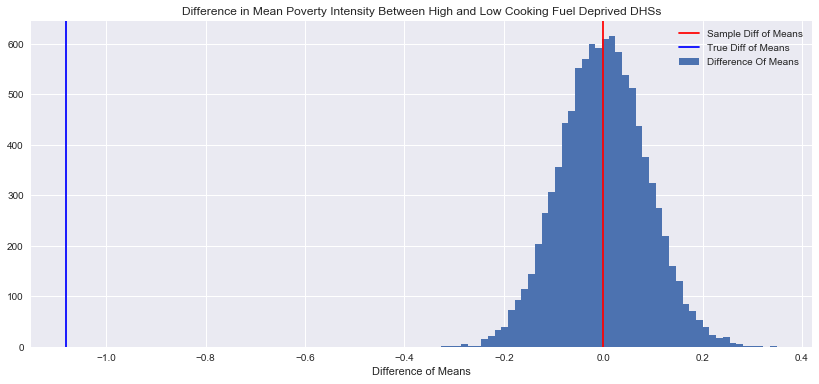

In [134]:
_ = plt.figure(figsize=(14,6))
_ = plt.hist(pov_cooking_density_perms, bins=50)
_ = plt.axvline(np.mean(pov_cooking_density_perms), color='red')
_ = plt.axvline(true_pov_cooking_diff_of_means, color='blue')
_ = plt.title('Difference in Mean Poverty Intensity Between High and Low Cooking Fuel Deprived DHSs')
_ = plt.legend(('Sample Diff of Means','True Diff of Means','Difference Of Means'))
_ = plt.xlabel('Difference of Means')
_ = plt.savefig('figures/48_cooking_depriv_poverty_diff_means')

### P-Value
The Probability of the True Difference of Poverty Occuring At Random.

In [135]:
print('P-Value: ', np.sum(pov_cooking_density_perms < true_pov_cooking_diff_of_means) / len(pov_cooking_density_perms))

P-Value:  0.0


### Conclusion
We <strong>reject the null hypothesis</strong> and conclude that <strong>there is statistically significant difference</strong> between the poverty intensity of DHS with high cooking fuel deprivation and low cooking fuel deprivation because of the low p-value (p-value is near 0).

# c) Population Size and Cooking Fuel Deprivation

### ECDF

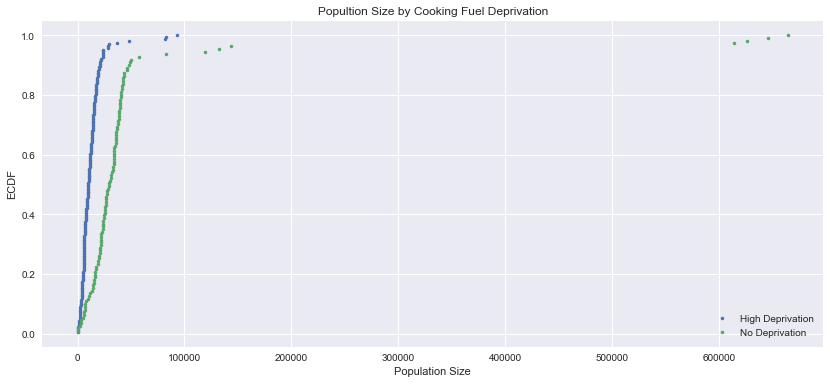

In [136]:
x_pop_size_cooking_high, y_pop_size_cooking_high = ecdf(high_cooking_fuel_depriv.All_Population_Count_2015)
x_pop_size_cooking_no, y_pop_size_cooking_no = ecdf(low_cooking_fuel_depriv.All_Population_Count_2015)

_ = plt.figure(figsize=(14,6))
_ = plt.plot(x_pop_size_cooking_high, y_pop_size_cooking_high, linestyle='none', marker='.')
_ = plt.plot(x_pop_size_cooking_no, y_pop_size_cooking_no, linestyle='none', marker='.')
_ = plt.title('Popultion Size by Cooking Fuel Deprivation')
_ = plt.legend(['High Deprivation','No Deprivation'])
_ = plt.xlabel('Population Size')
_ = plt.ylabel('ECDF')
_ = plt.savefig('figures/49_cooking_depriv_pop_size')

### Bootstrap Population Size
<strong>Significant Difference</strong> Between Population Size in High and Low Cooking Fuel Deprived Areas.

In [137]:
#Bootstrap Density Distributions of Data
bs_reps_pop_size_high_cooking_depriv = draw_bs_reps(high_cooking_fuel_depriv.All_Population_Count_2015, np.mean, 1000)
bs_reps_pop_size_low_cooking_depriv = draw_bs_reps(low_cooking_fuel_depriv.All_Population_Count_2015, np.mean, 1000)

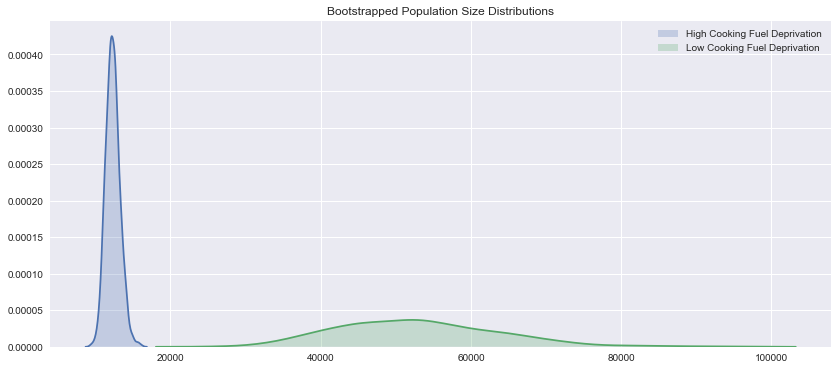

In [140]:
_ = plt.figure(figsize=(14,6))
_ = sns.kdeplot(bs_reps_pop_size_high_cooking_depriv, shade=True)
_ = sns.kdeplot(bs_reps_pop_size_low_cooking_depriv, shade=True)
_ = plt.title('Bootstrapped Population Size Distributions')
_ = plt.legend(['High Cooking Fuel Deprivation','Low Cooking Fuel Deprivation'])
_ = plt.savefig('figures/50_cooking_depriv_pop_size_bs')

### Bootstrap Mean & 95% Confidence Interval

In [141]:
print('High Electricity Deprivation Bootstrap Mean: ', np.mean(bs_reps_pop_size_high_cooking_depriv))
print('High Electricity Deprivation (95% Conf. Int): ', np.percentile(bs_reps_pop_size_high_cooking_depriv, [2.5,97.5]))
print('')
print('Low Electricity Deprivation Bootstrap Mean: ', np.mean(bs_reps_pop_size_low_cooking_depriv))
print('Low Electricity Deprivation (95% Conf. Int): ', np.percentile(bs_reps_pop_size_low_cooking_depriv, [2.5,97.5]))

High Electricity Deprivation Bootstrap Mean:  12336.642359310685
High Electricity Deprivation (95% Conf. Int):  [10645.47561674 14311.28954943]

Low Electricity Deprivation Bootstrap Mean:  52870.51198864143
Low Electricity Deprivation (95% Conf. Int):  [35021.41770798 75196.19518563]


### Hypothesis Testing (Permutation Testing)
- <strong>Null Hypothesis: </strong> No Difference in Population Size between High and Low Cooking Fuel Deprivation.
- <strong>Alternative Hypothesis: </strong> Difference in Population Size Between High and Low Cooking Fuel Deprivation.

### True Difference Of Means

In [142]:
true_pop_size_cooking_diff_of_means = np.mean(low_cooking_fuel_depriv.All_Population_Count_2015) - np.mean(high_cooking_fuel_depriv.All_Population_Count_2015)
print("True Difference Of Means: ", true_pop_size_cooking_diff_of_means)

True Difference Of Means:  40180.2521710016


### Permutation Difference Of Means

In [143]:
pop_size_cooking_perms = draw_perm_reps(low_cooking_fuel_depriv.All_Population_Count_2015, high_cooking_fuel_depriv.All_Population_Count_2015, diff_of_means, 10000)

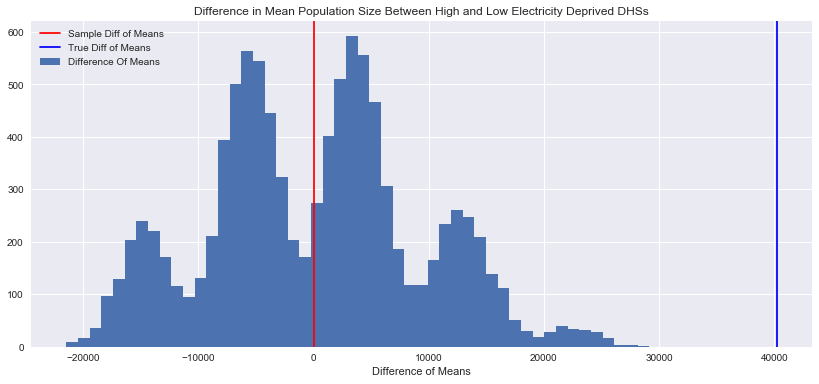

In [144]:
_ = plt.figure(figsize=(14,6))
_ = plt.hist(pop_size_cooking_perms, bins=50)
_ = plt.axvline(np.mean(pop_size_cooking_perms), color='red')
_ = plt.axvline(true_pop_size_cooking_diff_of_means, color='blue')
_ = plt.title('Difference in Mean Population Size Between High and Low Electricity Deprived DHSs')
_ = plt.legend(('Sample Diff of Means','True Diff of Means','Difference Of Means'))
_ = plt.xlabel('Difference of Means')
_ = plt.savefig('figures/51_cooking_depriv_pop_size_diff_means')

### P-Value
The Probability of the True Difference of Poverty Occuring At Random.

In [145]:
print('P-Value: ', np.sum(pop_size_cooking_perms > true_pop_size_cooking_diff_of_means) / len(pop_size_cooking_perms))

P-Value:  0.0


### Conclusion
We <strong>reject the null hypothesis</strong> and conclude that <strong>there is statistically significant difference</strong> between the population size of DHS with high electricity deprivation and low electricity deprivation because low p-value (p-value is near 0).

## The Question: 
- ## What Impacts Cooking Fuel Deprivation Most?

## Answer:  
- #### Poverty, Population Size and Population Density all play "significant" parts in electricity deprivation.

# Final Observations:
- <strong>Poverty and Population Density are important factors</strong> for availability of electricity and cooking fuel.
- <strong>Population Size was not significant statistically</strong> for electricity availability.
- <strong>Population Size was statistically significant</strong> for cooking fuel availability.
    - That being said, the significance of population size for cooking fuel was relatively small.

## Conclusion:
Electricity and Cooking Fuel (Gas) are things that requires a fair amount of capital in order to implement.  For this reason it is understandable that poverty and population density play a role in the availability of both goods.  With areas with large population but low density installation of electrical wiring and gas tubes would require more money as the area covered is larger.

For this reason, it makes sense that certain DHS clusters either have or don't have gas or electricity as they are costly to implement in areas with low potential ie high poverty low population density.


## Moving Forward:
A large transition for most developing countries is urbanization.  This is the migration of population from rural to urban areas or development of urban areas.  This does not seem to have occured at scale in Zimbabwe there were no significant shifts in population.  

As urban hubs begin to grow and more and more of the population moves away from rural areas to urban areas with basic amenities, there will be a shift in the distribution of people with access to these goods.  However, it is not cost effective for these amenities to be implemented in areas of low density, size and wealth, so it is not likely that there will be a normalization of the distribution of these amenities anytime soon.